In [120]:
### AMSA PROJECT NYNKE
library(tibble)
library(ggplot2)
file_path <- '10percent_amsa.csv'

# Read data from CSV file
celldata <- read.csv(file_path)
celldata$Pattern <- factor(celldata$Pattern, order=FALSE)

# Check the levels of the factor
print(levels(celldata$Pattern))

# Gather the data to long format for plotting
long_data <- tidyr::gather(celldata, key = "Dimension", value = "Value", -Pattern)
long_data$Dimension <- factor(long_data$Dimension, order = FALSE)

[1] "cell-edge"    "extranuclear" "intranuclear" "pericellular" "perinuclear" 
[6] "random"      


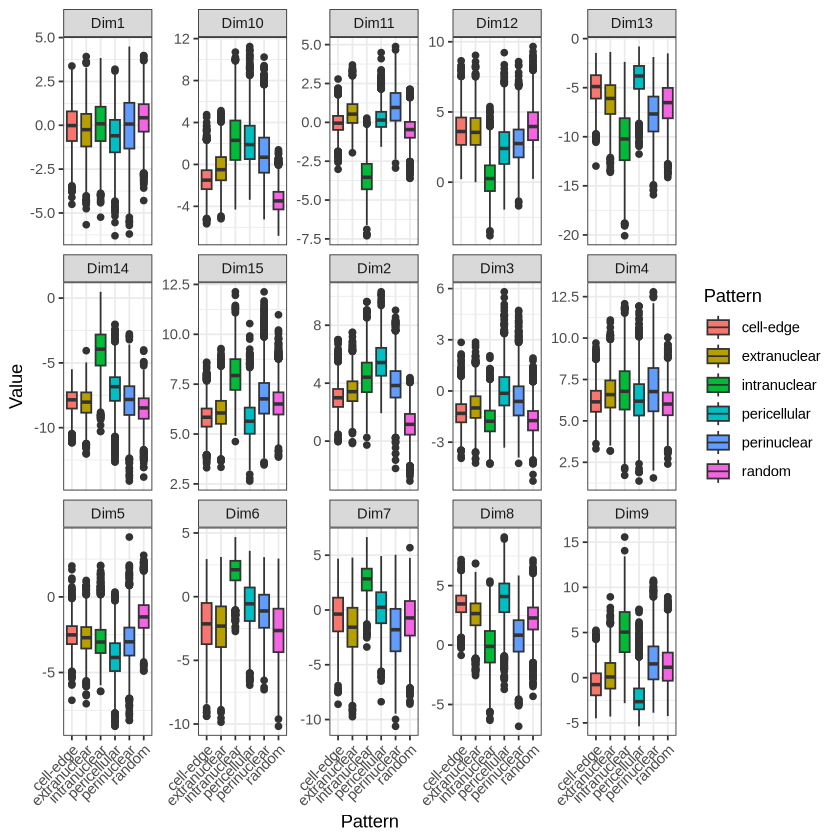

In [121]:
## ------------------------ Exploratory Analysis of the dataset -------------------------

# Create a boxplot using ggplot2
ggplot(long_data, aes(x = Pattern, y = Value, fill = Pattern)) +
  geom_boxplot(position = "dodge", width = 0.7) +
  facet_wrap(~Dimension, scales = "free_y", nrow = 3, ncol = 5) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

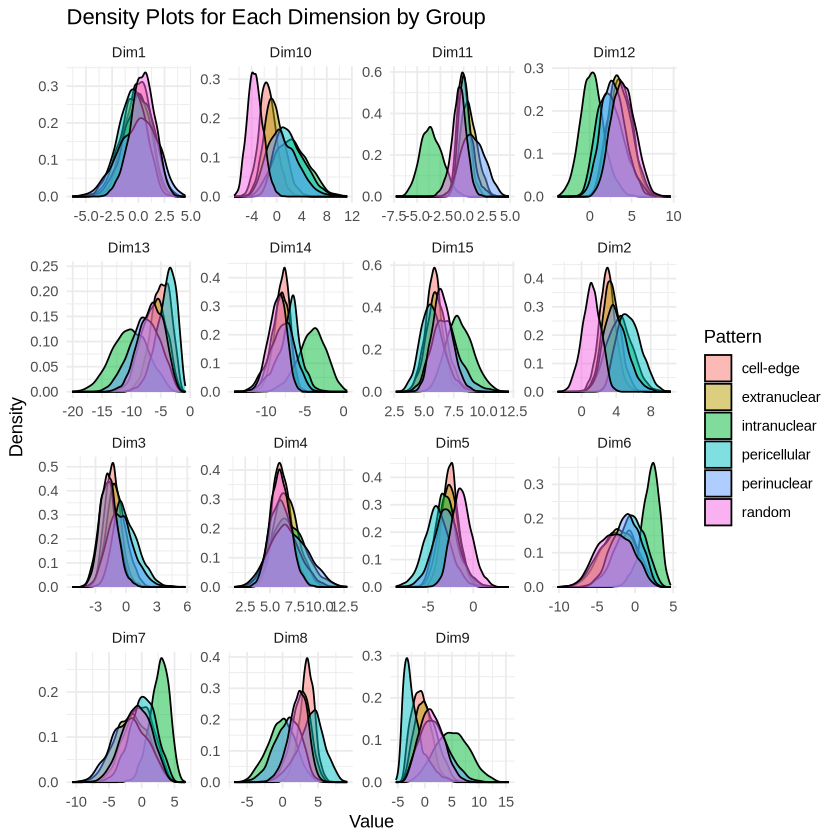

In [122]:
# Create density plots for each dimension
ggplot(long_data, aes(x = Value, fill = Pattern)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~Dimension, scales = "free") +
  labs(title = "Density Plots for Each Dimension by Group",
       x = "Value", y = "Density") +
  theme_minimal()

## Correlation heatmap

In [5]:
## Make a correlation heatmap

library(reshape2)
cordim <- cor(celldata[,1:15]) # get correlation matrix

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cordim){
  cordim[lower.tri(cordim)] <- NA
  return(cordim)
}

reorder_cordim <- function(cordim){
  # Use correlation between variables as distance
  dd <- as.dist((1-cordim)/2)
  hc <- hclust(dd)
  cordim <-cordim[hc$order, hc$order]
}

In [6]:
# Visualize correlation in heatmap between dimensions
upper_tri <- get_upper_tri(cordim)
upper_tri
melted_cordim <- melt(upper_tri, na.rm = TRUE)

ggheat_non_ordered <- ggplot(data = melted_cordim, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12,Dim13,Dim14,Dim15
Dim1,1,-0.2910058,-0.3217867,-0.1121239,0.2895319,0.3444891,0.4217176,0.178650252,-0.081816596,-0.37776570,-0.20779162,-0.30566261,0.336148525,-0.06190593,-0.01960977
Dim2,NA,1.0000000,0.4371787,0.1604874,-0.6475158,0.2870783,0.0397663,-0.023771397,0.011488312,0.78832182,-0.06373323,-0.48155148,-0.060628544,0.32512331,-0.09761481
Dim3,NA,NA,1.0000000,0.3963857,-0.4043350,-0.1903080,-0.3676704,0.200675119,0.003075257,0.49388979,0.33051862,0.11180662,0.005322079,-0.19044571,-0.26824209
Dim4,NA,NA,NA,1.0000000,0.1937819,-0.2379292,-0.2347150,-0.007986248,0.346420594,0.47461600,0.15562953,0.17358725,-0.274494630,0.02210715,0.09345609
Dim5,NA,NA,NA,NA,1.0000000,-0.3600733,-0.0399603,0.023493484,0.127972314,-0.44490629,0.01032753,0.30385126,-0.080337296,-0.30779715,0.26835781
Dim6,NA,NA,NA,NA,NA,1.0000000,0.7695234,-0.187750212,-0.122193444,0.21016034,-0.48004760,-0.72121349,0.147458176,0.65793909,0.21519033
Dim7,NA,NA,NA,NA,NA,NA,1.0000000,0.086078643,-0.193391450,-0.01208091,-0.44430172,-0.57372641,0.329481829,0.54078551,0.17319229
Dim8,NA,NA,NA,NA,NA,NA,NA,1.000000000,-0.581596412,-0.10320155,0.35144666,0.21694932,0.749008476,-0.41209463,-0.53244232
Dim9,NA,NA,NA,NA,NA,NA,NA,NA,1.000000000,0.25465400,-0.43685653,-0.09177943,-0.880987678,0.11651663,0.49314270
Dim10,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00000000,-0.05817625,-0.27981522,-0.326355363,0.35506141,0.15555064


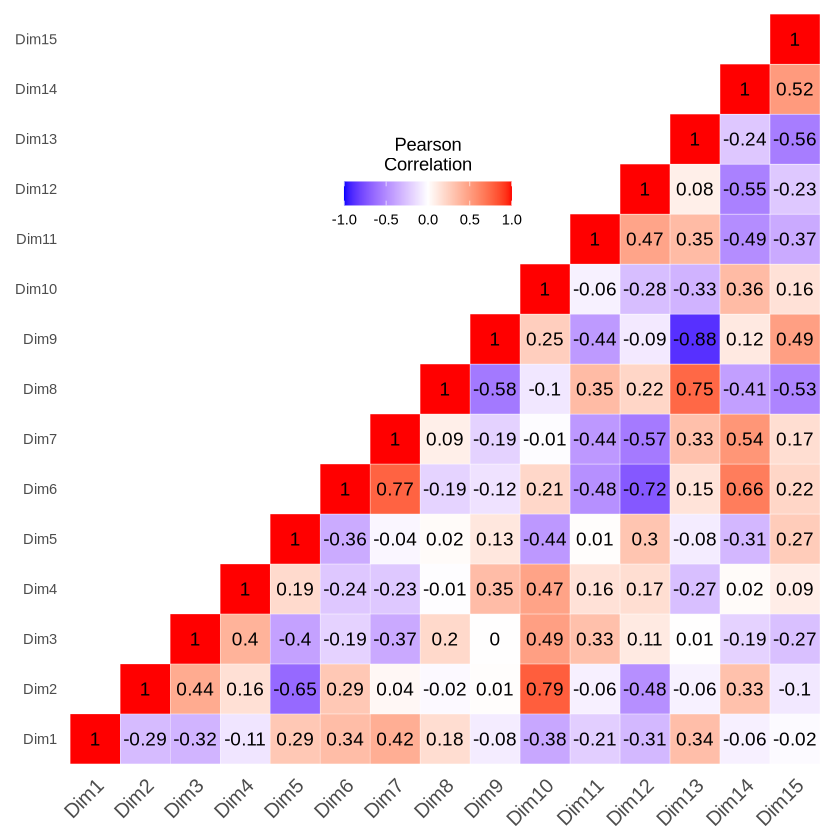

In [7]:
ggheat_non_ordered + 
geom_text(aes(Var2, Var1, label = round(value,2)), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

## Check whether the dimensions are multivariate normally distributed

We use the MVN package to test the multivariate normality. There doesn't seem to be one test that is preferred over another, so we will run the three methods below of them and take the majority vote as to whether our datset is multivariate normally distributed or not. We will afterwards run the clusters separately and see if they are multivariately distributed given that the pooled dataset might have a different distribution from the individual ones.

We run the following three tests: 
1. Mardia’s multivariate normality test
2. Doornik-Hansen’s multivariate normality test
3. Henze-Zirkler’s multivariate normality test

all test the following hypothesis:
* H0: The variables follow a multivariate normal distribution
* H1: The variables do not follow a multivariate normal distribution



In [8]:
# Testing for homogeneity of covariance matrices between the different clusters using the Box 's M test.
library(multiUS)
BoxMTest(celldata[,1:15],c=celldata$Pattern)

------------------------------------------------
      MBox    Chi-sqr          df            P
------------------------------------------------
90106.7140 89941.0632         600       0.0000
------------------------------------------------
Covariance matrices are significantly different.


In [9]:
#install.packages('MVN')
library(MVN)

In [10]:
mvn(data = celldata[,1:15], mvnTest = "hz") # Henze-Zirkler's multivariate normality test

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 3.304099       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1      22.6497  <0.001      NO    
2  Anderson-Darling   Dim2      10.5050  <0.001      NO    
3  Anderson-Darling   Dim3     124.4694  <0.001      NO    
4  Anderson-Darling   Dim4      94.7144  <0.001      NO    
5  Anderson-Darling   Dim5       5.6140  <0.001      NO    
6  Anderson-Darling   Dim6      33.3572  <0.001      NO    
7  Anderson-Darling   Dim7      29.8525  <0.001      NO    
8  Anderson-Darling   Dim8      94.0290  <0.001      NO    
9  Anderson-Darling   Dim9     147.3844  <0.001      NO    
10 Anderson-Darling   Dim10    130.8756  <0.001      NO    
11 Anderson-Darling   Dim11    514.0110  <0.001      NO    
12 Anderson-Darling   Dim12     26.3999  <0.001      NO    
13 Anderson-Darling   Dim13    157.1930  <0.001      NO    
14 Anderson-Darling   Dim14    316.2451  <0.001      NO    
15 Anderson-Darling   Dim15    114.1769  <0.001      NO    

$Descriptives
          n        Mean  Std.Dev      Median        Min        Max       25th
Dim1  21000 -0.03513369 1.397835  0.03662355  -6.301283  4.4890610 -0.9549648
Dim2  21000  3.23692323 1.930943  3.18786315  -2.758711 10.3107490  1.8751726
Dim3  21000 -1.11704461 1.190040 -1.25229405  -5.278780  5.8130520 -1.9298981
Dim4  21000  6.44297663 1.391693  6.30441750   1.366991 12.7949290  5.5040817
Dim5  21000 -2.50758189 1.507508 -2.50010145  -8.557107  3.9579961 -3.4763956
Dim6  21000 -1.39470937 2.521852 -1.30099540 -10.175416  4.6819177 -3.2071105
Dim7  21000 -0.38061794 2.608076 -0.28258346 -10.613545  6.6564640 -2.1867998
Dim8  21000  2.10915934 2.075988  2.34087510  -6.834755  9.0910130  0.8830980
Dim9  21000  0.98326268 3.092832  0.59524620  -5.376056 15.5689450 -1.2916313
Dim10 21000 -0.44302070 2.961535 -0.79641915  -6.810324 11.2463510 -2.7060647
Dim11 21000 -0.37387011 1.646049 -0.14179262  -7.299543  4.8784790 -0.8980749
Dim12 21000  2.99221170 1.876388  3.09143175  -3.819104  9.6590200  1.7837004
Dim13 21000 -6.65878860 2.884864 -6.27447875 -20.087820 -0.8065996 -8.3796220
Dim14 21000 -7.45584572 2.006485 -7.72809625 -14.116611  0.4882467 -8.7346670
Dim15 21000  6.51785203 1.201106  6.37467240   2.642667 12.1314220  5.7006201
            75th        Skew    Kurtosis
Dim1   0.9433312 -0.28386207  0.06564129
Dim2   4.5241763  0.17211349 -0.22422483
Dim3  -0.4613646  0.72886025  1.04818029
Dim4   7.2376442  0.54617465  0.71356857
Dim5  -1.5233678 -0.07665553  0.28430174
Dim6   0.4960794 -0.15511144 -0.55536683
Dim7   1.5605772 -0.24104734 -0.35170488
Dim8   3.5090934 -0.44709283  0.35820431
Dim9   2.7903293  0.72020239  0.43283945
Dim10  1.4484946  0.57505432 -0.04717949
Dim11  0.5589042 -0.89241392  1.21369868
Dim12  4.2998139 -0.26086945 -0.03686859
Dim13 -4.5051307 -0.72739998  0.42974650
Dim14 -6.6154064  0.87097917  1.07008468
Dim15  7.2037599  0.62464564  0.65783772

In [11]:
mvn(data = celldata[,1:15], mvnTest = "dh")#Doornik-Hansen's multivariate normality test

$multivariateNormality
            Test        E df p value MVN
1 Doornik-Hansen 3161.106 30       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1      22.6497  <0.001      NO    
2  Anderson-Darling   Dim2      10.5050  <0.001      NO    
3  Anderson-Darling   Dim3     124.4694  <0.001      NO    
4  Anderson-Darling   Dim4      94.7144  <0.001      NO    
5  Anderson-Darling   Dim5       5.6140  <0.001      NO    
6  Anderson-Darling   Dim6      33.3572  <0.001      NO    
7  Anderson-Darling   Dim7      29.8525  <0.001      NO    
8  Anderson-Darling   Dim8      94.0290  <0.001      NO    
9  Anderson-Darling   Dim9     147.3844  <0.001      NO    
10 Anderson-Darling   Dim10    130.8756  <0.001      NO    
11 Anderson-Darling   Dim11    514.0110  <0.001      NO    
12 Anderson-Darling   Dim12     26.3999  <0.001      NO    
13 Anderson-Darling   Dim13    157.1930  <0.001      NO    
14 Anderson-Darling   Dim14    316.2451  <0.001      NO    
15 Anderson-Darling   Dim15    114.1769  <0.001      NO    

$Descriptives
          n        Mean  Std.Dev      Median        Min        Max       25th
Dim1  21000 -0.03513369 1.397835  0.03662355  -6.301283  4.4890610 -0.9549648
Dim2  21000  3.23692323 1.930943  3.18786315  -2.758711 10.3107490  1.8751726
Dim3  21000 -1.11704461 1.190040 -1.25229405  -5.278780  5.8130520 -1.9298981
Dim4  21000  6.44297663 1.391693  6.30441750   1.366991 12.7949290  5.5040817
Dim5  21000 -2.50758189 1.507508 -2.50010145  -8.557107  3.9579961 -3.4763956
Dim6  21000 -1.39470937 2.521852 -1.30099540 -10.175416  4.6819177 -3.2071105
Dim7  21000 -0.38061794 2.608076 -0.28258346 -10.613545  6.6564640 -2.1867998
Dim8  21000  2.10915934 2.075988  2.34087510  -6.834755  9.0910130  0.8830980
Dim9  21000  0.98326268 3.092832  0.59524620  -5.376056 15.5689450 -1.2916313
Dim10 21000 -0.44302070 2.961535 -0.79641915  -6.810324 11.2463510 -2.7060647
Dim11 21000 -0.37387011 1.646049 -0.14179262  -7.299543  4.8784790 -0.8980749
Dim12 21000  2.99221170 1.876388  3.09143175  -3.819104  9.6590200  1.7837004
Dim13 21000 -6.65878860 2.884864 -6.27447875 -20.087820 -0.8065996 -8.3796220
Dim14 21000 -7.45584572 2.006485 -7.72809625 -14.116611  0.4882467 -8.7346670
Dim15 21000  6.51785203 1.201106  6.37467240   2.642667 12.1314220  5.7006201
            75th        Skew    Kurtosis
Dim1   0.9433312 -0.28386207  0.06564129
Dim2   4.5241763  0.17211349 -0.22422483
Dim3  -0.4613646  0.72886025  1.04818029
Dim4   7.2376442  0.54617465  0.71356857
Dim5  -1.5233678 -0.07665553  0.28430174
Dim6   0.4960794 -0.15511144 -0.55536683
Dim7   1.5605772 -0.24104734 -0.35170488
Dim8   3.5090934 -0.44709283  0.35820431
Dim9   2.7903293  0.72020239  0.43283945
Dim10  1.4484946  0.57505432 -0.04717949
Dim11  0.5589042 -0.89241392  1.21369868
Dim12  4.2998139 -0.26086945 -0.03686859
Dim13 -4.5051307 -0.72739998  0.42974650
Dim14 -6.6154064  0.87097917  1.07008468
Dim15  7.2037599  0.62464564  0.65783772

In [12]:
mvn(data = celldata[,1:15], mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 100796.093854106       0     NO
2 Mardia Kurtosis 136.252287896415       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1      22.6497  <0.001      NO    
2  Anderson-Darling   Dim2      10.5050  <0.001      NO    
3  Anderson-Darling   Dim3     124.4694  <0.001      NO    
4  Anderson-Darling   Dim4      94.7144  <0.001      NO    
5  Anderson-Darling   Dim5       5.6140  <0.001      NO    
6  Anderson-Darling   Dim6      33.3572  <0.001      NO    
7  Anderson-Darling   Dim7      29.8525  <0.001      NO    
8  Anderson-Darling   Dim8      94.0290  <0.001      NO    
9  Anderson-Darling   Dim9     147.3844  <0.001      NO    
10 Anderson-Darling   Dim10    130.8756  <0.001      NO    
11 Anderson-Darling   Dim11    514.0110  <0.001      NO    
12 Anderson-Darling   Dim12     26.3999  <0.001      NO    
13 Anderson-Darling   Dim13    157.1930  <0.001      NO    
14 Anderson-Darling   Dim14    316.2451  <0.001      NO    
15 Anderson-Darling   Dim15    114.1769  <0.001      NO    

$Descriptives
          n        Mean  Std.Dev      Median        Min        Max       25th
Dim1  21000 -0.03513369 1.397835  0.03662355  -6.301283  4.4890610 -0.9549648
Dim2  21000  3.23692323 1.930943  3.18786315  -2.758711 10.3107490  1.8751726
Dim3  21000 -1.11704461 1.190040 -1.25229405  -5.278780  5.8130520 -1.9298981
Dim4  21000  6.44297663 1.391693  6.30441750   1.366991 12.7949290  5.5040817
Dim5  21000 -2.50758189 1.507508 -2.50010145  -8.557107  3.9579961 -3.4763956
Dim6  21000 -1.39470937 2.521852 -1.30099540 -10.175416  4.6819177 -3.2071105
Dim7  21000 -0.38061794 2.608076 -0.28258346 -10.613545  6.6564640 -2.1867998
Dim8  21000  2.10915934 2.075988  2.34087510  -6.834755  9.0910130  0.8830980
Dim9  21000  0.98326268 3.092832  0.59524620  -5.376056 15.5689450 -1.2916313
Dim10 21000 -0.44302070 2.961535 -0.79641915  -6.810324 11.2463510 -2.7060647
Dim11 21000 -0.37387011 1.646049 -0.14179262  -7.299543  4.8784790 -0.8980749
Dim12 21000  2.99221170 1.876388  3.09143175  -3.819104  9.6590200  1.7837004
Dim13 21000 -6.65878860 2.884864 -6.27447875 -20.087820 -0.8065996 -8.3796220
Dim14 21000 -7.45584572 2.006485 -7.72809625 -14.116611  0.4882467 -8.7346670
Dim15 21000  6.51785203 1.201106  6.37467240   2.642667 12.1314220  5.7006201
            75th        Skew    Kurtosis
Dim1   0.9433312 -0.28386207  0.06564129
Dim2   4.5241763  0.17211349 -0.22422483
Dim3  -0.4613646  0.72886025  1.04818029
Dim4   7.2376442  0.54617465  0.71356857
Dim5  -1.5233678 -0.07665553  0.28430174
Dim6   0.4960794 -0.15511144 -0.55536683
Dim7   1.5605772 -0.24104734 -0.35170488
Dim8   3.5090934 -0.44709283  0.35820431
Dim9   2.7903293  0.72020239  0.43283945
Dim10  1.4484946  0.57505432 -0.04717949
Dim11  0.5589042 -0.89241392  1.21369868
Dim12  4.2998139 -0.26086945 -0.03686859
Dim13 -4.5051307 -0.72739998  0.42974650
Dim14 -6.6154064  0.87097917  1.07008468
Dim15  7.2037599  0.62464564  0.65783772

Based on the tests above, we can reject the null hypothesis that the dimensions are multivariate normally distributed. Therefore we 


In [13]:
## ---------------- Testing for multivariate normal distribution of our 6 pattern classes -------------------
# Split the dataframe per cluster
grouped_data <- split(celldata, celldata$Pattern)

# Compute covariance matrices for each group
cov_matrices <- lapply(grouped_data, function(x) cov(x[,1:15])) 

In [14]:
cell_edge <- celldata[celldata$Pattern == "cell-edge", 1:15]
extranuclear <- celldata[celldata$Pattern == "extranuclear", 1:15]
intranuclear <- celldata[celldata$Pattern == "intranuclear", 1:15]
pericellular <- celldata[celldata$Pattern == "pericellular", 1:15]
perinuclear <- celldata[celldata$Pattern == "perinuclear", 1:15]
random <- celldata[celldata$Pattern == "random", 1:15]

In [15]:
mvn(data = cell_edge, mvnTest = "hz") # Henze-Zirkler's multivariate normality test
mvn(data = cell_edge, mvnTest = "dh")#Doornik-Hansen's multivariate normality test
mvn(data = cell_edge, mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 1.536761       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.4357  <0.001      NO    
2  Anderson-Darling   Dim2       2.2432  <0.001      NO    
3  Anderson-Darling   Dim3       4.1844  <0.001      NO    
4  Anderson-Darling   Dim4       6.3804  <0.001      NO    
5  Anderson-Darling   Dim5       1.8910   1e-04      NO    
6  Anderson-Darling   Dim6       5.9281  <0.001      NO    
7  Anderson-Darling   Dim7       4.0200  <0.001      NO    
8  Anderson-Darling   Dim8       4.3143  <0.001      NO    
9  Anderson-Darling   Dim9       8.1311  <0.001      NO    
10 Anderson-Darling   Dim10      2.7292  <0.001      NO    
11 Anderson-Darling   Dim11      3.5743  <0.001      NO    
12 Anderson-Darling   Dim12      2.1675  <0.001      NO    
13 Anderson-Darling   Dim13      8.4479  <0.001      NO    
14 Anderson-Darling   Dim14     11.5106  <0.001      NO    
15 Anderson-Darling   Dim15      2.0106  <0.001      NO    

$Descriptives
         n        Mean   Std.Dev      Median          Min       Max       25th
Dim1  3000 -0.06899968 1.2014359 -0.01642688  -4.50696470  3.379967 -0.8963188
Dim2  3000  3.01047553 0.9729507  2.99265465  -0.04547181  7.007626  2.3610635
Dim3  3000 -1.27714023 0.8083354 -1.31425020  -3.95070720  2.848920 -1.8366358
Dim4  3000  6.21904759 0.9390807  6.14912830   3.30897300  9.700564  5.5496193
Dim5  3000 -2.50586719 0.9308485 -2.51415850  -6.83782200  2.045477 -3.1230865
Dim6  3000 -2.15662221 2.2075144 -2.13451005  -9.38794700  2.952120 -3.7273377
Dim7  3000 -0.45018365 2.1631657 -0.37513752  -8.60279200  4.681083 -1.9524178
Dim8  3000  3.41283554 1.0829596  3.46166080  -0.86444150  7.194619  2.7640252
Dim9  3000 -0.67667757 1.6795573 -0.76464500  -4.49652300  5.257586 -1.9495207
Dim10 3000 -1.43449934 1.4087174 -1.50094680  -5.66681700  4.750020 -2.3608081
Dim11 3000 -0.02234577 0.6805029 -0.05180516  -3.02166700  2.787628 -0.4848243
Dim12 3000  3.63639441 1.3599922  3.60759785   0.21501449  8.646054  2.6575150
Dim13 3000 -4.99695001 1.6763276 -4.88592980 -12.98438000 -1.454761 -6.1074393
Dim14 3000 -7.94317229 0.9329986 -7.84894300 -11.17203100 -5.492708 -8.5236007
Dim15 3000  5.83831465 0.7342848  5.84225385   3.30673170  8.600653  5.3693421
            75th       Skew    Kurtosis
Dim1   0.7926634 -0.2031563 -0.25371389
Dim2   3.5988408  0.2262907  0.47403741
Dim3  -0.7721678  0.4094316  0.63509397
Dim4   6.8186710  0.3532642  0.05666297
Dim5  -1.9334938  0.1562054  0.60374882
Dim6  -0.4931056 -0.1830846 -0.47879051
Dim7   1.1264944 -0.2254581 -0.34232300
Dim8   4.1687791 -0.2547239  0.29166362
Dim9   0.4863770  0.3670454 -0.27216224
Dim10 -0.5526977  0.2688363  0.38480252
Dim11  0.4154131  0.1490055  0.49985444
Dim12  4.6042661  0.1779279 -0.24353521
Dim13 -3.7260906 -0.4138500 -0.10692262
Dim14 -7.2623402 -0.4953881  0.09056572
Dim15  6.2792095  0.1025151  0.30169664

$multivariateNormality
            Test        E df      p value MVN
1 Doornik-Hansen 470.4833 30 1.327894e-80  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.4357  <0.001      NO    
2  Anderson-Darling   Dim2       2.2432  <0.001      NO    
3  Anderson-Darling   Dim3       4.1844  <0.001      NO    
4  Anderson-Darling   Dim4       6.3804  <0.001      NO    
5  Anderson-Darling   Dim5       1.8910   1e-04      NO    
6  Anderson-Darling   Dim6       5.9281  <0.001      NO    
7  Anderson-Darling   Dim7       4.0200  <0.001      NO    
8  Anderson-Darling   Dim8       4.3143  <0.001      NO    
9  Anderson-Darling   Dim9       8.1311  <0.001      NO    
10 Anderson-Darling   Dim10      2.7292  <0.001      NO    
11 Anderson-Darling   Dim11      3.5743  <0.001      NO    
12 Anderson-Darling   Dim12      2.1675  <0.001      NO    
13 Anderson-Darling   Dim13      8.4479  <0.001      NO    
14 Anderson-Darling   Dim14     11.5106  <0.001      NO    
15 Anderson-Darling   Dim15      2.0106  <0.001      NO    

$Descriptives
         n        Mean   Std.Dev      Median          Min       Max       25th
Dim1  3000 -0.06899968 1.2014359 -0.01642688  -4.50696470  3.379967 -0.8963188
Dim2  3000  3.01047553 0.9729507  2.99265465  -0.04547181  7.007626  2.3610635
Dim3  3000 -1.27714023 0.8083354 -1.31425020  -3.95070720  2.848920 -1.8366358
Dim4  3000  6.21904759 0.9390807  6.14912830   3.30897300  9.700564  5.5496193
Dim5  3000 -2.50586719 0.9308485 -2.51415850  -6.83782200  2.045477 -3.1230865
Dim6  3000 -2.15662221 2.2075144 -2.13451005  -9.38794700  2.952120 -3.7273377
Dim7  3000 -0.45018365 2.1631657 -0.37513752  -8.60279200  4.681083 -1.9524178
Dim8  3000  3.41283554 1.0829596  3.46166080  -0.86444150  7.194619  2.7640252
Dim9  3000 -0.67667757 1.6795573 -0.76464500  -4.49652300  5.257586 -1.9495207
Dim10 3000 -1.43449934 1.4087174 -1.50094680  -5.66681700  4.750020 -2.3608081
Dim11 3000 -0.02234577 0.6805029 -0.05180516  -3.02166700  2.787628 -0.4848243
Dim12 3000  3.63639441 1.3599922  3.60759785   0.21501449  8.646054  2.6575150
Dim13 3000 -4.99695001 1.6763276 -4.88592980 -12.98438000 -1.454761 -6.1074393
Dim14 3000 -7.94317229 0.9329986 -7.84894300 -11.17203100 -5.492708 -8.5236007
Dim15 3000  5.83831465 0.7342848  5.84225385   3.30673170  8.600653  5.3693421
            75th       Skew    Kurtosis
Dim1   0.7926634 -0.2031563 -0.25371389
Dim2   3.5988408  0.2262907  0.47403741
Dim3  -0.7721678  0.4094316  0.63509397
Dim4   6.8186710  0.3532642  0.05666297
Dim5  -1.9334938  0.1562054  0.60374882
Dim6  -0.4931056 -0.1830846 -0.47879051
Dim7   1.1264944 -0.2254581 -0.34232300
Dim8   4.1687791 -0.2547239  0.29166362
Dim9   0.4863770  0.3670454 -0.27216224
Dim10 -0.5526977  0.2688363  0.38480252
Dim11  0.4154131  0.1490055  0.49985444
Dim12  4.6042661  0.1779279 -0.24353521
Dim13 -3.7260906 -0.4138500 -0.10692262
Dim14 -7.2623402 -0.4953881  0.09056572
Dim15  6.2792095  0.1025151  0.30169664

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 6404.48755702342       0     NO
2 Mardia Kurtosis 41.8701782971168       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.4357  <0.001      NO    
2  Anderson-Darling   Dim2       2.2432  <0.001      NO    
3  Anderson-Darling   Dim3       4.1844  <0.001      NO    
4  Anderson-Darling   Dim4       6.3804  <0.001      NO    
5  Anderson-Darling   Dim5       1.8910   1e-04      NO    
6  Anderson-Darling   Dim6       5.9281  <0.001      NO    
7  Anderson-Darling   Dim7       4.0200  <0.001      NO    
8  Anderson-Darling   Dim8       4.3143  <0.001      NO    
9  Anderson-Darling   Dim9       8.1311  <0.001      NO    
10 Anderson-Darling   Dim10      2.7292  <0.001      NO    
11 Anderson-Darling   Dim11      3.5743  <0.001      NO    
12 Anderson-Darling   Dim12      2.1675  <0.001      NO    
13 Anderson-Darling   Dim13      8.4479  <0.001      NO    
14 Anderson-Darling   Dim14     11.5106  <0.001      NO    
15 Anderson-Darling   Dim15      2.0106  <0.001      NO    

$Descriptives
         n        Mean   Std.Dev      Median          Min       Max       25th
Dim1  3000 -0.06899968 1.2014359 -0.01642688  -4.50696470  3.379967 -0.8963188
Dim2  3000  3.01047553 0.9729507  2.99265465  -0.04547181  7.007626  2.3610635
Dim3  3000 -1.27714023 0.8083354 -1.31425020  -3.95070720  2.848920 -1.8366358
Dim4  3000  6.21904759 0.9390807  6.14912830   3.30897300  9.700564  5.5496193
Dim5  3000 -2.50586719 0.9308485 -2.51415850  -6.83782200  2.045477 -3.1230865
Dim6  3000 -2.15662221 2.2075144 -2.13451005  -9.38794700  2.952120 -3.7273377
Dim7  3000 -0.45018365 2.1631657 -0.37513752  -8.60279200  4.681083 -1.9524178
Dim8  3000  3.41283554 1.0829596  3.46166080  -0.86444150  7.194619  2.7640252
Dim9  3000 -0.67667757 1.6795573 -0.76464500  -4.49652300  5.257586 -1.9495207
Dim10 3000 -1.43449934 1.4087174 -1.50094680  -5.66681700  4.750020 -2.3608081
Dim11 3000 -0.02234577 0.6805029 -0.05180516  -3.02166700  2.787628 -0.4848243
Dim12 3000  3.63639441 1.3599922  3.60759785   0.21501449  8.646054  2.6575150
Dim13 3000 -4.99695001 1.6763276 -4.88592980 -12.98438000 -1.454761 -6.1074393
Dim14 3000 -7.94317229 0.9329986 -7.84894300 -11.17203100 -5.492708 -8.5236007
Dim15 3000  5.83831465 0.7342848  5.84225385   3.30673170  8.600653  5.3693421
            75th       Skew    Kurtosis
Dim1   0.7926634 -0.2031563 -0.25371389
Dim2   3.5988408  0.2262907  0.47403741
Dim3  -0.7721678  0.4094316  0.63509397
Dim4   6.8186710  0.3532642  0.05666297
Dim5  -1.9334938  0.1562054  0.60374882
Dim6  -0.4931056 -0.1830846 -0.47879051
Dim7   1.1264944 -0.2254581 -0.34232300
Dim8   4.1687791 -0.2547239  0.29166362
Dim9   0.4863770  0.3670454 -0.27216224
Dim10 -0.5526977  0.2688363  0.38480252
Dim11  0.4154131  0.1490055  0.49985444
Dim12  4.6042661  0.1779279 -0.24353521
Dim13 -3.7260906 -0.4138500 -0.10692262
Dim14 -7.2623402 -0.4953881  0.09056572
Dim15  6.2792095  0.1025151  0.30169664

In [16]:
mvn(data = extranuclear, mvnTest = "hz") # Henze-Zirkler's multivariate normality test
mvn(data = extranuclear, mvnTest = "dh")#Doornik-Hansen's multivariate normality test
mvn(data = extranuclear, mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 1.206204       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.7556  <0.001      NO    
2  Anderson-Darling   Dim2       1.6194   4e-04      NO    
3  Anderson-Darling   Dim3       4.0711  <0.001      NO    
4  Anderson-Darling   Dim4       2.5091  <0.001      NO    
5  Anderson-Darling   Dim5       0.4116  0.3403      YES   
6  Anderson-Darling   Dim6       5.3733  <0.001      NO    
7  Anderson-Darling   Dim7       2.8402  <0.001      NO    
8  Anderson-Darling   Dim8       5.5827  <0.001      NO    
9  Anderson-Darling   Dim9      10.0710  <0.001      NO    
10 Anderson-Darling   Dim10      4.0023  <0.001      NO    
11 Anderson-Darling   Dim11      7.1289  <0.001      NO    
12 Anderson-Darling   Dim12      3.9327  <0.001      NO    
13 Anderson-Darling   Dim13      5.9622  <0.001      NO    
14 Anderson-Darling   Dim14      3.9884  <0.001      NO    
15 Anderson-Darling   Dim15      2.3481  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev      Median           Min       Max        25th
Dim1  3000 -0.3309908 1.3438215 -0.25057604  -5.670148000  3.917646 -1.20849377
Dim2  3000  3.4468178 1.0337380  3.41311415  -0.166024200  7.519848  2.76110578
Dim3  3000 -0.9273719 0.9671876 -0.99586352  -4.226626000  2.866440 -1.57686497
Dim4  3000  6.6535253 1.2028157  6.58664740   3.183853400 11.090673  5.80434830
Dim5  3000 -2.6959853 1.0765738 -2.69857575  -7.065671000  1.089265 -3.41451265
Dim6  3000 -2.4098084 2.1856557 -2.30710365  -9.854573000  3.120283 -3.95546760
Dim7  3000 -1.6451739 2.4730649 -1.57168615  -9.740960000  4.779938 -3.36197307
Dim8  3000  2.5333105 1.3996858  2.64825820  -2.569578400  6.885637  1.66313180
Dim9  3000  0.2900507 2.0071477  0.08602868  -4.299072700  8.948713 -1.20551065
Dim10 3000 -0.3901721 1.6115187 -0.50285831  -5.187905000  5.129013 -1.51443777
Dim11 3000  0.5947910 0.8697818  0.52862390  -1.956366100  3.693976 -0.03840007
Dim12 3000  3.6334620 1.3816306  3.54681765  -0.007524789  9.031378  2.65253552
Dim13 3000 -6.2363794 2.0570868 -6.09480130 -13.618834000 -1.349393 -7.67691515
Dim14 3000 -8.1006401 1.1357251 -8.02564050 -12.019009000 -4.056227 -8.84347650
Dim15 3000  6.1000062 0.8881701  6.05530415   3.332715500  9.285231  5.51252225
            75th        Skew     Kurtosis
Dim1   0.6493889 -0.22600532 -0.153875028
Dim2   4.1286626  0.16175898  0.163830859
Dim3  -0.3112594  0.26380899  0.091594901
Dim4   7.4436415  0.21296776 -0.106532359
Dim5  -1.9965644  0.05303466  0.252016040
Dim6  -0.7618711 -0.22006622 -0.423872922
Dim7   0.2015420 -0.15080918 -0.379582097
Dim8   3.5084200 -0.36055507  0.155174782
Dim9   1.6339984  0.40870322 -0.182262285
Dim10  0.7013779  0.27121019 -0.008936241
Dim11  1.1728918  0.33378689 -0.122042728
Dim12  4.5663029  0.26516294 -0.153755976
Dim13 -4.7384380 -0.31779086 -0.224138888
Dim14 -7.2753919 -0.26330536 -0.054944860
Dim15  6.6642121  0.21074804  0.101582385

$multivariateNormality
            Test        E df       p value MVN
1 Doornik-Hansen 671.1262 30 5.077764e-122  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.7556  <0.001      NO    
2  Anderson-Darling   Dim2       1.6194   4e-04      NO    
3  Anderson-Darling   Dim3       4.0711  <0.001      NO    
4  Anderson-Darling   Dim4       2.5091  <0.001      NO    
5  Anderson-Darling   Dim5       0.4116  0.3403      YES   
6  Anderson-Darling   Dim6       5.3733  <0.001      NO    
7  Anderson-Darling   Dim7       2.8402  <0.001      NO    
8  Anderson-Darling   Dim8       5.5827  <0.001      NO    
9  Anderson-Darling   Dim9      10.0710  <0.001      NO    
10 Anderson-Darling   Dim10      4.0023  <0.001      NO    
11 Anderson-Darling   Dim11      7.1289  <0.001      NO    
12 Anderson-Darling   Dim12      3.9327  <0.001      NO    
13 Anderson-Darling   Dim13      5.9622  <0.001      NO    
14 Anderson-Darling   Dim14      3.9884  <0.001      NO    
15 Anderson-Darling   Dim15      2.3481  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev      Median           Min       Max        25th
Dim1  3000 -0.3309908 1.3438215 -0.25057604  -5.670148000  3.917646 -1.20849377
Dim2  3000  3.4468178 1.0337380  3.41311415  -0.166024200  7.519848  2.76110578
Dim3  3000 -0.9273719 0.9671876 -0.99586352  -4.226626000  2.866440 -1.57686497
Dim4  3000  6.6535253 1.2028157  6.58664740   3.183853400 11.090673  5.80434830
Dim5  3000 -2.6959853 1.0765738 -2.69857575  -7.065671000  1.089265 -3.41451265
Dim6  3000 -2.4098084 2.1856557 -2.30710365  -9.854573000  3.120283 -3.95546760
Dim7  3000 -1.6451739 2.4730649 -1.57168615  -9.740960000  4.779938 -3.36197307
Dim8  3000  2.5333105 1.3996858  2.64825820  -2.569578400  6.885637  1.66313180
Dim9  3000  0.2900507 2.0071477  0.08602868  -4.299072700  8.948713 -1.20551065
Dim10 3000 -0.3901721 1.6115187 -0.50285831  -5.187905000  5.129013 -1.51443777
Dim11 3000  0.5947910 0.8697818  0.52862390  -1.956366100  3.693976 -0.03840007
Dim12 3000  3.6334620 1.3816306  3.54681765  -0.007524789  9.031378  2.65253552
Dim13 3000 -6.2363794 2.0570868 -6.09480130 -13.618834000 -1.349393 -7.67691515
Dim14 3000 -8.1006401 1.1357251 -8.02564050 -12.019009000 -4.056227 -8.84347650
Dim15 3000  6.1000062 0.8881701  6.05530415   3.332715500  9.285231  5.51252225
            75th        Skew     Kurtosis
Dim1   0.6493889 -0.22600532 -0.153875028
Dim2   4.1286626  0.16175898  0.163830859
Dim3  -0.3112594  0.26380899  0.091594901
Dim4   7.4436415  0.21296776 -0.106532359
Dim5  -1.9965644  0.05303466  0.252016040
Dim6  -0.7618711 -0.22006622 -0.423872922
Dim7   0.2015420 -0.15080918 -0.379582097
Dim8   3.5084200 -0.36055507  0.155174782
Dim9   1.6339984  0.40870322 -0.182262285
Dim10  0.7013779  0.27121019 -0.008936241
Dim11  1.1728918  0.33378689 -0.122042728
Dim12  4.5663029  0.26516294 -0.153755976
Dim13 -4.7384380 -0.31779086 -0.224138888
Dim14 -7.2753919 -0.26330536 -0.054944860
Dim15  6.6642121  0.21074804  0.101582385

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 6150.91015582134       0     NO
2 Mardia Kurtosis 24.5449468790343       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.7556  <0.001      NO    
2  Anderson-Darling   Dim2       1.6194   4e-04      NO    
3  Anderson-Darling   Dim3       4.0711  <0.001      NO    
4  Anderson-Darling   Dim4       2.5091  <0.001      NO    
5  Anderson-Darling   Dim5       0.4116  0.3403      YES   
6  Anderson-Darling   Dim6       5.3733  <0.001      NO    
7  Anderson-Darling   Dim7       2.8402  <0.001      NO    
8  Anderson-Darling   Dim8       5.5827  <0.001      NO    
9  Anderson-Darling   Dim9      10.0710  <0.001      NO    
10 Anderson-Darling   Dim10      4.0023  <0.001      NO    
11 Anderson-Darling   Dim11      7.1289  <0.001      NO    
12 Anderson-Darling   Dim12      3.9327  <0.001      NO    
13 Anderson-Darling   Dim13      5.9622  <0.001      NO    
14 Anderson-Darling   Dim14      3.9884  <0.001      NO    
15 Anderson-Darling   Dim15      2.3481  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev      Median           Min       Max        25th
Dim1  3000 -0.3309908 1.3438215 -0.25057604  -5.670148000  3.917646 -1.20849377
Dim2  3000  3.4468178 1.0337380  3.41311415  -0.166024200  7.519848  2.76110578
Dim3  3000 -0.9273719 0.9671876 -0.99586352  -4.226626000  2.866440 -1.57686497
Dim4  3000  6.6535253 1.2028157  6.58664740   3.183853400 11.090673  5.80434830
Dim5  3000 -2.6959853 1.0765738 -2.69857575  -7.065671000  1.089265 -3.41451265
Dim6  3000 -2.4098084 2.1856557 -2.30710365  -9.854573000  3.120283 -3.95546760
Dim7  3000 -1.6451739 2.4730649 -1.57168615  -9.740960000  4.779938 -3.36197307
Dim8  3000  2.5333105 1.3996858  2.64825820  -2.569578400  6.885637  1.66313180
Dim9  3000  0.2900507 2.0071477  0.08602868  -4.299072700  8.948713 -1.20551065
Dim10 3000 -0.3901721 1.6115187 -0.50285831  -5.187905000  5.129013 -1.51443777
Dim11 3000  0.5947910 0.8697818  0.52862390  -1.956366100  3.693976 -0.03840007
Dim12 3000  3.6334620 1.3816306  3.54681765  -0.007524789  9.031378  2.65253552
Dim13 3000 -6.2363794 2.0570868 -6.09480130 -13.618834000 -1.349393 -7.67691515
Dim14 3000 -8.1006401 1.1357251 -8.02564050 -12.019009000 -4.056227 -8.84347650
Dim15 3000  6.1000062 0.8881701  6.05530415   3.332715500  9.285231  5.51252225
            75th        Skew     Kurtosis
Dim1   0.6493889 -0.22600532 -0.153875028
Dim2   4.1286626  0.16175898  0.163830859
Dim3  -0.3112594  0.26380899  0.091594901
Dim4   7.4436415  0.21296776 -0.106532359
Dim5  -1.9965644  0.05303466  0.252016040
Dim6  -0.7618711 -0.22006622 -0.423872922
Dim7   0.2015420 -0.15080918 -0.379582097
Dim8   3.5084200 -0.36055507  0.155174782
Dim9   1.6339984  0.40870322 -0.182262285
Dim10  0.7013779  0.27121019 -0.008936241
Dim11  1.1728918  0.33378689 -0.122042728
Dim12  4.5663029  0.26516294 -0.153755976
Dim13 -4.7384380 -0.31779086 -0.224138888
Dim14 -7.2753919 -0.26330536 -0.054944860
Dim15  6.6642121  0.21074804  0.101582385

In [17]:
mvn(data = intranuclear, mvnTest = "hz") # Henze-Zirkler's multivariate normality test
mvn(data = intranuclear, mvnTest = "dh")#Doornik-Hansen's multivariate normality test
mvn(data = intranuclear, mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 1.261158       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       2.1928  <0.001      NO    
2  Anderson-Darling   Dim2       0.8714  0.0255      NO    
3  Anderson-Darling   Dim3       3.4035  <0.001      NO    
4  Anderson-Darling   Dim4       3.6120  <0.001      NO    
5  Anderson-Darling   Dim5      12.6295  <0.001      NO    
6  Anderson-Darling   Dim6      14.3339  <0.001      NO    
7  Anderson-Darling   Dim7       9.1054  <0.001      NO    
8  Anderson-Darling   Dim8       1.4095  0.0012      NO    
9  Anderson-Darling   Dim9       1.8567   1e-04      NO    
10 Anderson-Darling   Dim10      3.6769  <0.001      NO    
11 Anderson-Darling   Dim11      3.3116  <0.001      NO    
12 Anderson-Darling   Dim12      2.5560  <0.001      NO    
13 Anderson-Darling   Dim13      1.8692   1e-04      NO    
14 Anderson-Darling   Dim14      3.7402  <0.001      NO    
15 Anderson-Darling   Dim15      3.2668  <0.001      NO    

$Descriptives
         n         Mean   Std.Dev       Median         Min        Max
Dim1  3000   0.05679462 1.3926566   0.08278061  -5.2414940  3.8365357
Dim2  3000   4.42970518 1.4927457   4.41172110  -0.2735505  9.6394900
Dim3  3000  -1.72470013 0.9135408  -1.77351545  -4.2885410  2.0618248
Dim4  3000   6.88468621 1.6799402   6.78521450   1.7111896 12.0744530
Dim5  3000  -2.87701086 1.2251764  -2.98773375  -6.2524137  2.0840065
Dim6  3000   1.98176489 1.1507721   2.11426055  -2.7308133  4.6819177
Dim7  3000   2.70838918 1.4541885   2.84182905  -3.3787968  6.6564640
Dim8  3000  -0.17555888 1.9273344  -0.10892821  -6.3299140  5.3795620
Dim9  3000   5.07308885 3.0795541   5.04616535  -2.8163264 15.5689450
Dim10 3000   2.38248262 2.6189066   2.29423675  -4.3023996 10.7150450
Dim11 3000  -3.46691120 1.1726293  -3.53443970  -7.2995434  0.2739682
Dim12 3000   0.31136625 1.3882271   0.25422570  -3.8191035  5.3834043
Dim13 3000 -10.27535669 2.9745542 -10.22354750 -20.0878200 -2.3718540
Dim14 3000  -4.05332713 1.7867122  -3.94085345 -10.2954760  0.4882467
Dim15 3000   8.00644802 1.1144213   7.93191230   4.6205810 12.1314220
             25th      75th        Skew    Kurtosis
Dim1   -0.9004497  1.056072 -0.20413796 -0.18706217
Dim2    3.3839159  5.420524  0.16030187 -0.08999938
Dim3   -2.3674678 -1.148760  0.28769037  0.07241524
Dim4    5.6843835  7.999714  0.24753464 -0.11614510
Dim5   -3.7133839 -2.175964  0.57405125  0.50374721
Dim6    1.2808515  2.815179 -0.60595754  0.37311077
Dim7    1.7730730  3.772614 -0.43530208  0.02989341
Dim8   -1.4691112  1.187687 -0.11460326 -0.28024955
Dim9    2.8323577  7.271154  0.08212786 -0.42569995
Dim10   0.4243768  4.189069  0.21837887 -0.33636998
Dim11  -4.3077965 -2.670188  0.18151660 -0.17406868
Dim12  -0.6328978  1.197006  0.24535977  0.15134161
Dim13 -12.3788620 -8.106524 -0.11300136 -0.39153925
Dim14  -5.2058222 -2.808500 -0.28794815 -0.12836621
Dim15   7.2119847  8.754667  0.23818221 -0.15169742

$multivariateNormality
            Test        E df p value MVN
1 Doornik-Hansen 1902.262 30       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       2.1928  <0.001      NO    
2  Anderson-Darling   Dim2       0.8714  0.0255      NO    
3  Anderson-Darling   Dim3       3.4035  <0.001      NO    
4  Anderson-Darling   Dim4       3.6120  <0.001      NO    
5  Anderson-Darling   Dim5      12.6295  <0.001      NO    
6  Anderson-Darling   Dim6      14.3339  <0.001      NO    
7  Anderson-Darling   Dim7       9.1054  <0.001      NO    
8  Anderson-Darling   Dim8       1.4095  0.0012      NO    
9  Anderson-Darling   Dim9       1.8567   1e-04      NO    
10 Anderson-Darling   Dim10      3.6769  <0.001      NO    
11 Anderson-Darling   Dim11      3.3116  <0.001      NO    
12 Anderson-Darling   Dim12      2.5560  <0.001      NO    
13 Anderson-Darling   Dim13      1.8692   1e-04      NO    
14 Anderson-Darling   Dim14      3.7402  <0.001      NO    
15 Anderson-Darling   Dim15      3.2668  <0.001      NO    

$Descriptives
         n         Mean   Std.Dev       Median         Min        Max
Dim1  3000   0.05679462 1.3926566   0.08278061  -5.2414940  3.8365357
Dim2  3000   4.42970518 1.4927457   4.41172110  -0.2735505  9.6394900
Dim3  3000  -1.72470013 0.9135408  -1.77351545  -4.2885410  2.0618248
Dim4  3000   6.88468621 1.6799402   6.78521450   1.7111896 12.0744530
Dim5  3000  -2.87701086 1.2251764  -2.98773375  -6.2524137  2.0840065
Dim6  3000   1.98176489 1.1507721   2.11426055  -2.7308133  4.6819177
Dim7  3000   2.70838918 1.4541885   2.84182905  -3.3787968  6.6564640
Dim8  3000  -0.17555888 1.9273344  -0.10892821  -6.3299140  5.3795620
Dim9  3000   5.07308885 3.0795541   5.04616535  -2.8163264 15.5689450
Dim10 3000   2.38248262 2.6189066   2.29423675  -4.3023996 10.7150450
Dim11 3000  -3.46691120 1.1726293  -3.53443970  -7.2995434  0.2739682
Dim12 3000   0.31136625 1.3882271   0.25422570  -3.8191035  5.3834043
Dim13 3000 -10.27535669 2.9745542 -10.22354750 -20.0878200 -2.3718540
Dim14 3000  -4.05332713 1.7867122  -3.94085345 -10.2954760  0.4882467
Dim15 3000   8.00644802 1.1144213   7.93191230   4.6205810 12.1314220
             25th      75th        Skew    Kurtosis
Dim1   -0.9004497  1.056072 -0.20413796 -0.18706217
Dim2    3.3839159  5.420524  0.16030187 -0.08999938
Dim3   -2.3674678 -1.148760  0.28769037  0.07241524
Dim4    5.6843835  7.999714  0.24753464 -0.11614510
Dim5   -3.7133839 -2.175964  0.57405125  0.50374721
Dim6    1.2808515  2.815179 -0.60595754  0.37311077
Dim7    1.7730730  3.772614 -0.43530208  0.02989341
Dim8   -1.4691112  1.187687 -0.11460326 -0.28024955
Dim9    2.8323577  7.271154  0.08212786 -0.42569995
Dim10   0.4243768  4.189069  0.21837887 -0.33636998
Dim11  -4.3077965 -2.670188  0.18151660 -0.17406868
Dim12  -0.6328978  1.197006  0.24535977  0.15134161
Dim13 -12.3788620 -8.106524 -0.11300136 -0.39153925
Dim14  -5.2058222 -2.808500 -0.28794815 -0.12836621
Dim15   7.2119847  8.754667  0.23818221 -0.15169742

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 11576.4567147863       0     NO
2 Mardia Kurtosis 22.7613015955693       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       2.1928  <0.001      NO    
2  Anderson-Darling   Dim2       0.8714  0.0255      NO    
3  Anderson-Darling   Dim3       3.4035  <0.001      NO    
4  Anderson-Darling   Dim4       3.6120  <0.001      NO    
5  Anderson-Darling   Dim5      12.6295  <0.001      NO    
6  Anderson-Darling   Dim6      14.3339  <0.001      NO    
7  Anderson-Darling   Dim7       9.1054  <0.001      NO    
8  Anderson-Darling   Dim8       1.4095  0.0012      NO    
9  Anderson-Darling   Dim9       1.8567   1e-04      NO    
10 Anderson-Darling   Dim10      3.6769  <0.001      NO    
11 Anderson-Darling   Dim11      3.3116  <0.001      NO    
12 Anderson-Darling   Dim12      2.5560  <0.001      NO    
13 Anderson-Darling   Dim13      1.8692   1e-04      NO    
14 Anderson-Darling   Dim14      3.7402  <0.001      NO    
15 Anderson-Darling   Dim15      3.2668  <0.001      NO    

$Descriptives
         n         Mean   Std.Dev       Median         Min        Max
Dim1  3000   0.05679462 1.3926566   0.08278061  -5.2414940  3.8365357
Dim2  3000   4.42970518 1.4927457   4.41172110  -0.2735505  9.6394900
Dim3  3000  -1.72470013 0.9135408  -1.77351545  -4.2885410  2.0618248
Dim4  3000   6.88468621 1.6799402   6.78521450   1.7111896 12.0744530
Dim5  3000  -2.87701086 1.2251764  -2.98773375  -6.2524137  2.0840065
Dim6  3000   1.98176489 1.1507721   2.11426055  -2.7308133  4.6819177
Dim7  3000   2.70838918 1.4541885   2.84182905  -3.3787968  6.6564640
Dim8  3000  -0.17555888 1.9273344  -0.10892821  -6.3299140  5.3795620
Dim9  3000   5.07308885 3.0795541   5.04616535  -2.8163264 15.5689450
Dim10 3000   2.38248262 2.6189066   2.29423675  -4.3023996 10.7150450
Dim11 3000  -3.46691120 1.1726293  -3.53443970  -7.2995434  0.2739682
Dim12 3000   0.31136625 1.3882271   0.25422570  -3.8191035  5.3834043
Dim13 3000 -10.27535669 2.9745542 -10.22354750 -20.0878200 -2.3718540
Dim14 3000  -4.05332713 1.7867122  -3.94085345 -10.2954760  0.4882467
Dim15 3000   8.00644802 1.1144213   7.93191230   4.6205810 12.1314220
             25th      75th        Skew    Kurtosis
Dim1   -0.9004497  1.056072 -0.20413796 -0.18706217
Dim2    3.3839159  5.420524  0.16030187 -0.08999938
Dim3   -2.3674678 -1.148760  0.28769037  0.07241524
Dim4    5.6843835  7.999714  0.24753464 -0.11614510
Dim5   -3.7133839 -2.175964  0.57405125  0.50374721
Dim6    1.2808515  2.815179 -0.60595754  0.37311077
Dim7    1.7730730  3.772614 -0.43530208  0.02989341
Dim8   -1.4691112  1.187687 -0.11460326 -0.28024955
Dim9    2.8323577  7.271154  0.08212786 -0.42569995
Dim10   0.4243768  4.189069  0.21837887 -0.33636998
Dim11  -4.3077965 -2.670188  0.18151660 -0.17406868
Dim12  -0.6328978  1.197006  0.24535977  0.15134161
Dim13 -12.3788620 -8.106524 -0.11300136 -0.39153925
Dim14  -5.2058222 -2.808500 -0.28794815 -0.12836621
Dim15   7.2119847  8.754667  0.23818221 -0.15169742

In [18]:
mvn(data = pericellular, mvnTest = "hz") # Henze-Zirkler's multivariate normality test
mvn(data = pericellular, mvnTest = "dh")#Doornik-Hansen's multivariate normality test
mvn(data = pericellular, mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 2.279004       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       2.9621  <0.001      NO    
2  Anderson-Darling   Dim2       6.9375  <0.001      NO    
3  Anderson-Darling   Dim3      17.3773  <0.001      NO    
4  Anderson-Darling   Dim4       9.8928  <0.001      NO    
5  Anderson-Darling   Dim5       0.8277  0.0327      NO    
6  Anderson-Darling   Dim6       5.5890  <0.001      NO    
7  Anderson-Darling   Dim7       2.8440  <0.001      NO    
8  Anderson-Darling   Dim8       9.4584  <0.001      NO    
9  Anderson-Darling   Dim9      89.1093  <0.001      NO    
10 Anderson-Darling   Dim10     19.6890  <0.001      NO    
11 Anderson-Darling   Dim11     24.2250  <0.001      NO    
12 Anderson-Darling   Dim12     10.9903  <0.001      NO    
13 Anderson-Darling   Dim13     26.4050  <0.001      NO    
14 Anderson-Darling   Dim14     21.6548  <0.001      NO    
15 Anderson-Darling   Dim15      6.6773  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev     Median        Min        Max       25th
Dim1  3000 -0.6396707 1.3296189 -0.5980692  -6.301283  3.1986475 -1.5405591
Dim2  3000  5.5216074 1.3499477  5.4249932   1.924085 10.3107490  4.5137095
Dim3  3000  0.0375557 1.2338271 -0.1375071  -3.323597  5.8130520 -0.8494571
Dim4  3000  6.3428415 1.4454570  6.1906595   1.366991 11.9295580  5.3239353
Dim5  3000 -3.9861448 1.4292190 -4.0070347  -8.557107  0.3212555 -4.9051508
Dim6  3000 -0.6622419 1.8685739 -0.5610673  -6.949612  3.6007260 -1.9100196
Dim7  3000  0.1659737 2.0122017  0.2395670  -8.374338  4.9199276 -1.2095341
Dim8  3000  3.9251195 1.9112463  4.0860233  -3.725413  9.0910130  2.7681448
Dim9  3000 -2.1058552 1.9434442 -2.6521965  -5.376056  7.5710583 -3.4993351
Dim10 3000  2.2093547 2.3175351  1.8914159  -3.374339 11.2463510  0.5069516
Dim11 3000  0.2491835 0.7718569  0.1461702  -1.573493  4.4900190 -0.2957021
Dim12 3000  2.5339413 1.6051167  2.4002524  -1.954821  9.2243560  1.3002544
Dim13 3000 -4.0721171 1.7103509 -3.8083300 -11.765409 -0.8065996 -5.1179710
Dim14 3000 -7.0578951 1.5738461 -6.8336720 -12.653751 -2.0206797 -7.9268253
Dim15 3000  5.7109571 0.9977274  5.6424566   2.642667 10.5374130  5.0143253
            75th        Skew    Kurtosis
Dim1   0.3090990 -0.27760226 -0.03859697
Dim2   6.4375948  0.32429905 -0.27598026
Dim3   0.8166918  0.61222659  0.45632523
Dim4   7.2196235  0.39985221  0.30272073
Dim5  -3.0614824  0.01520527  0.07125848
Dim6   0.7219792 -0.34928389 -0.17385754
Dim7   1.6195327 -0.25252409 -0.18946825
Dim8   5.1838499 -0.45918193  0.30796848
Dim9  -1.1857737  1.33528364  1.90981192
Dim10  3.6938733  0.62610907  0.20724118
Dim11  0.6788061  0.82092708  1.13051924
Dim12  3.5678066  0.44905508 -0.08275838
Dim13 -2.7809100 -0.76219776  0.47351566
Dim14 -6.1032039 -0.46509056  0.51382885
Dim15  6.3252365  0.44165258  0.46548732

$multivariateNormality
            Test       E df       p value MVN
1 Doornik-Hansen 1348.35 30 7.603699e-265  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       2.9621  <0.001      NO    
2  Anderson-Darling   Dim2       6.9375  <0.001      NO    
3  Anderson-Darling   Dim3      17.3773  <0.001      NO    
4  Anderson-Darling   Dim4       9.8928  <0.001      NO    
5  Anderson-Darling   Dim5       0.8277  0.0327      NO    
6  Anderson-Darling   Dim6       5.5890  <0.001      NO    
7  Anderson-Darling   Dim7       2.8440  <0.001      NO    
8  Anderson-Darling   Dim8       9.4584  <0.001      NO    
9  Anderson-Darling   Dim9      89.1093  <0.001      NO    
10 Anderson-Darling   Dim10     19.6890  <0.001      NO    
11 Anderson-Darling   Dim11     24.2250  <0.001      NO    
12 Anderson-Darling   Dim12     10.9903  <0.001      NO    
13 Anderson-Darling   Dim13     26.4050  <0.001      NO    
14 Anderson-Darling   Dim14     21.6548  <0.001      NO    
15 Anderson-Darling   Dim15      6.6773  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev     Median        Min        Max       25th
Dim1  3000 -0.6396707 1.3296189 -0.5980692  -6.301283  3.1986475 -1.5405591
Dim2  3000  5.5216074 1.3499477  5.4249932   1.924085 10.3107490  4.5137095
Dim3  3000  0.0375557 1.2338271 -0.1375071  -3.323597  5.8130520 -0.8494571
Dim4  3000  6.3428415 1.4454570  6.1906595   1.366991 11.9295580  5.3239353
Dim5  3000 -3.9861448 1.4292190 -4.0070347  -8.557107  0.3212555 -4.9051508
Dim6  3000 -0.6622419 1.8685739 -0.5610673  -6.949612  3.6007260 -1.9100196
Dim7  3000  0.1659737 2.0122017  0.2395670  -8.374338  4.9199276 -1.2095341
Dim8  3000  3.9251195 1.9112463  4.0860233  -3.725413  9.0910130  2.7681448
Dim9  3000 -2.1058552 1.9434442 -2.6521965  -5.376056  7.5710583 -3.4993351
Dim10 3000  2.2093547 2.3175351  1.8914159  -3.374339 11.2463510  0.5069516
Dim11 3000  0.2491835 0.7718569  0.1461702  -1.573493  4.4900190 -0.2957021
Dim12 3000  2.5339413 1.6051167  2.4002524  -1.954821  9.2243560  1.3002544
Dim13 3000 -4.0721171 1.7103509 -3.8083300 -11.765409 -0.8065996 -5.1179710
Dim14 3000 -7.0578951 1.5738461 -6.8336720 -12.653751 -2.0206797 -7.9268253
Dim15 3000  5.7109571 0.9977274  5.6424566   2.642667 10.5374130  5.0143253
            75th        Skew    Kurtosis
Dim1   0.3090990 -0.27760226 -0.03859697
Dim2   6.4375948  0.32429905 -0.27598026
Dim3   0.8166918  0.61222659  0.45632523
Dim4   7.2196235  0.39985221  0.30272073
Dim5  -3.0614824  0.01520527  0.07125848
Dim6   0.7219792 -0.34928389 -0.17385754
Dim7   1.6195327 -0.25252409 -0.18946825
Dim8   5.1838499 -0.45918193  0.30796848
Dim9  -1.1857737  1.33528364  1.90981192
Dim10  3.6938733  0.62610907  0.20724118
Dim11  0.6788061  0.82092708  1.13051924
Dim12  3.5678066  0.44905508 -0.08275838
Dim13 -2.7809100 -0.76219776  0.47351566
Dim14 -6.1032039 -0.46509056  0.51382885
Dim15  6.3252365  0.44165258  0.46548732

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 20923.0510621716       0     NO
2 Mardia Kurtosis 73.4105598996801       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       2.9621  <0.001      NO    
2  Anderson-Darling   Dim2       6.9375  <0.001      NO    
3  Anderson-Darling   Dim3      17.3773  <0.001      NO    
4  Anderson-Darling   Dim4       9.8928  <0.001      NO    
5  Anderson-Darling   Dim5       0.8277  0.0327      NO    
6  Anderson-Darling   Dim6       5.5890  <0.001      NO    
7  Anderson-Darling   Dim7       2.8440  <0.001      NO    
8  Anderson-Darling   Dim8       9.4584  <0.001      NO    
9  Anderson-Darling   Dim9      89.1093  <0.001      NO    
10 Anderson-Darling   Dim10     19.6890  <0.001      NO    
11 Anderson-Darling   Dim11     24.2250  <0.001      NO    
12 Anderson-Darling   Dim12     10.9903  <0.001      NO    
13 Anderson-Darling   Dim13     26.4050  <0.001      NO    
14 Anderson-Darling   Dim14     21.6548  <0.001      NO    
15 Anderson-Darling   Dim15      6.6773  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev     Median        Min        Max       25th
Dim1  3000 -0.6396707 1.3296189 -0.5980692  -6.301283  3.1986475 -1.5405591
Dim2  3000  5.5216074 1.3499477  5.4249932   1.924085 10.3107490  4.5137095
Dim3  3000  0.0375557 1.2338271 -0.1375071  -3.323597  5.8130520 -0.8494571
Dim4  3000  6.3428415 1.4454570  6.1906595   1.366991 11.9295580  5.3239353
Dim5  3000 -3.9861448 1.4292190 -4.0070347  -8.557107  0.3212555 -4.9051508
Dim6  3000 -0.6622419 1.8685739 -0.5610673  -6.949612  3.6007260 -1.9100196
Dim7  3000  0.1659737 2.0122017  0.2395670  -8.374338  4.9199276 -1.2095341
Dim8  3000  3.9251195 1.9112463  4.0860233  -3.725413  9.0910130  2.7681448
Dim9  3000 -2.1058552 1.9434442 -2.6521965  -5.376056  7.5710583 -3.4993351
Dim10 3000  2.2093547 2.3175351  1.8914159  -3.374339 11.2463510  0.5069516
Dim11 3000  0.2491835 0.7718569  0.1461702  -1.573493  4.4900190 -0.2957021
Dim12 3000  2.5339413 1.6051167  2.4002524  -1.954821  9.2243560  1.3002544
Dim13 3000 -4.0721171 1.7103509 -3.8083300 -11.765409 -0.8065996 -5.1179710
Dim14 3000 -7.0578951 1.5738461 -6.8336720 -12.653751 -2.0206797 -7.9268253
Dim15 3000  5.7109571 0.9977274  5.6424566   2.642667 10.5374130  5.0143253
            75th        Skew    Kurtosis
Dim1   0.3090990 -0.27760226 -0.03859697
Dim2   6.4375948  0.32429905 -0.27598026
Dim3   0.8166918  0.61222659  0.45632523
Dim4   7.2196235  0.39985221  0.30272073
Dim5  -3.0614824  0.01520527  0.07125848
Dim6   0.7219792 -0.34928389 -0.17385754
Dim7   1.6195327 -0.25252409 -0.18946825
Dim8   5.1838499 -0.45918193  0.30796848
Dim9  -1.1857737  1.33528364  1.90981192
Dim10  3.6938733  0.62610907  0.20724118
Dim11  0.6788061  0.82092708  1.13051924
Dim12  3.5678066  0.44905508 -0.08275838
Dim13 -2.7809100 -0.76219776  0.47351566
Dim14 -6.1032039 -0.46509056  0.51382885
Dim15  6.3252365  0.44165258  0.46548732

In [19]:
mvn(data = perinuclear, mvnTest = "hz") # Henze-Zirkler's multivariate normality test
mvn(data = perinuclear, mvnTest = "dh")#Doornik-Hansen's multivariate normality test
mvn(data = perinuclear, mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 1.337718       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       5.5499  <0.001      NO    
2  Anderson-Darling   Dim2       6.2645  <0.001      NO    
3  Anderson-Darling   Dim3       6.4879  <0.001      NO    
4  Anderson-Darling   Dim4       3.2972  <0.001      NO    
5  Anderson-Darling   Dim5       1.6185   4e-04      NO    
6  Anderson-Darling   Dim6       3.6181  <0.001      NO    
7  Anderson-Darling   Dim7       2.5864  <0.001      NO    
8  Anderson-Darling   Dim8       5.3079  <0.001      NO    
9  Anderson-Darling   Dim9       9.4397  <0.001      NO    
10 Anderson-Darling   Dim10     10.8803  <0.001      NO    
11 Anderson-Darling   Dim11      4.0842  <0.001      NO    
12 Anderson-Darling   Dim12      2.3736  <0.001      NO    
13 Anderson-Darling   Dim13      3.6352  <0.001      NO    
14 Anderson-Darling   Dim14      4.1245  <0.001      NO    
15 Anderson-Darling   Dim15     10.8865  <0.001      NO    

$Descriptives
         n        Mean  Std.Dev     Median        Min       Max       25th
Dim1  3000 -0.05107374 1.790726  0.0705492  -6.199596  4.489061 -1.3283663
Dim2  3000  3.95422355 1.364175  3.8371173  -1.888476  9.034692  3.0068298
Dim3  3000 -0.51589718 1.294114 -0.6121633  -4.241335  4.721264 -1.4329196
Dim4  3000  6.90300913 1.855146  6.7697749   1.553765 12.794929  5.5784739
Dim5  3000 -2.95110891 1.457346 -2.9721474  -8.166602  3.957996 -3.8785483
Dim6  3000 -1.19061487 1.779170 -1.1215747  -7.306159  3.103126 -2.4384362
Dim7  3000 -1.85265275 2.650410 -1.8007336 -10.613545  5.040595 -3.7687768
Dim8  3000  0.71634799 1.865531  0.8337347  -6.834755  5.859990 -0.5505018
Dim9  3000  1.75431836 2.632042  1.5284856  -3.875874 10.793242 -0.1852427
Dim10 3000  0.97218624 2.411486  0.6820263  -5.246721 10.237475 -0.7907697
Dim11 3000  1.01615696 1.231137  0.9550748  -2.941817  4.878479  0.1103780
Dim12 3000  2.80611261 1.428759  2.7506284  -1.689498  8.587026  1.7644500
Dim13 3000 -7.76012330 2.551523 -7.6767590 -15.917417 -1.874447 -9.4617060
Dim14 3000 -7.93211632 1.644162 -7.8243301 -14.116611 -2.758244 -9.0172467
Dim15 3000  6.86023622 1.215792  6.7614811   3.449159 12.128523  6.0225962
            75th        Skew     Kurtosis
Dim1   1.2808374 -0.26312976 -0.334141028
Dim2   4.8353767  0.28315833  0.360735838
Dim3   0.2719801  0.43813485  0.283075065
Dim4   8.1914945  0.17480723 -0.339783542
Dim5  -2.0270295  0.09901170  0.450961814
Dim6   0.1556870 -0.19495812 -0.409850531
Dim7   0.1018465 -0.07673202 -0.462764290
Dim8   2.0925803 -0.30128607 -0.130323860
Dim9   3.4654147  0.44301584 -0.117164577
Dim10  2.5576864  0.47390161  0.045462929
Dim11  1.8886036  0.13710447 -0.409372137
Dim12  3.7497410  0.23024477  0.006042706
Dim13 -5.9043982 -0.22146403 -0.399208208
Dim14 -6.7988426 -0.25702748 -0.032042402
Dim15  7.5576580  0.57775133  0.705144719

$multivariateNormality
            Test        E df       p value MVN
1 Doornik-Hansen 1146.829 30 4.550948e-222  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       5.5499  <0.001      NO    
2  Anderson-Darling   Dim2       6.2645  <0.001      NO    
3  Anderson-Darling   Dim3       6.4879  <0.001      NO    
4  Anderson-Darling   Dim4       3.2972  <0.001      NO    
5  Anderson-Darling   Dim5       1.6185   4e-04      NO    
6  Anderson-Darling   Dim6       3.6181  <0.001      NO    
7  Anderson-Darling   Dim7       2.5864  <0.001      NO    
8  Anderson-Darling   Dim8       5.3079  <0.001      NO    
9  Anderson-Darling   Dim9       9.4397  <0.001      NO    
10 Anderson-Darling   Dim10     10.8803  <0.001      NO    
11 Anderson-Darling   Dim11      4.0842  <0.001      NO    
12 Anderson-Darling   Dim12      2.3736  <0.001      NO    
13 Anderson-Darling   Dim13      3.6352  <0.001      NO    
14 Anderson-Darling   Dim14      4.1245  <0.001      NO    
15 Anderson-Darling   Dim15     10.8865  <0.001      NO    

$Descriptives
         n        Mean  Std.Dev     Median        Min       Max       25th
Dim1  3000 -0.05107374 1.790726  0.0705492  -6.199596  4.489061 -1.3283663
Dim2  3000  3.95422355 1.364175  3.8371173  -1.888476  9.034692  3.0068298
Dim3  3000 -0.51589718 1.294114 -0.6121633  -4.241335  4.721264 -1.4329196
Dim4  3000  6.90300913 1.855146  6.7697749   1.553765 12.794929  5.5784739
Dim5  3000 -2.95110891 1.457346 -2.9721474  -8.166602  3.957996 -3.8785483
Dim6  3000 -1.19061487 1.779170 -1.1215747  -7.306159  3.103126 -2.4384362
Dim7  3000 -1.85265275 2.650410 -1.8007336 -10.613545  5.040595 -3.7687768
Dim8  3000  0.71634799 1.865531  0.8337347  -6.834755  5.859990 -0.5505018
Dim9  3000  1.75431836 2.632042  1.5284856  -3.875874 10.793242 -0.1852427
Dim10 3000  0.97218624 2.411486  0.6820263  -5.246721 10.237475 -0.7907697
Dim11 3000  1.01615696 1.231137  0.9550748  -2.941817  4.878479  0.1103780
Dim12 3000  2.80611261 1.428759  2.7506284  -1.689498  8.587026  1.7644500
Dim13 3000 -7.76012330 2.551523 -7.6767590 -15.917417 -1.874447 -9.4617060
Dim14 3000 -7.93211632 1.644162 -7.8243301 -14.116611 -2.758244 -9.0172467
Dim15 3000  6.86023622 1.215792  6.7614811   3.449159 12.128523  6.0225962
            75th        Skew     Kurtosis
Dim1   1.2808374 -0.26312976 -0.334141028
Dim2   4.8353767  0.28315833  0.360735838
Dim3   0.2719801  0.43813485  0.283075065
Dim4   8.1914945  0.17480723 -0.339783542
Dim5  -2.0270295  0.09901170  0.450961814
Dim6   0.1556870 -0.19495812 -0.409850531
Dim7   0.1018465 -0.07673202 -0.462764290
Dim8   2.0925803 -0.30128607 -0.130323860
Dim9   3.4654147  0.44301584 -0.117164577
Dim10  2.5576864  0.47390161  0.045462929
Dim11  1.8886036  0.13710447 -0.409372137
Dim12  3.7497410  0.23024477  0.006042706
Dim13 -5.9043982 -0.22146403 -0.399208208
Dim14 -6.7988426 -0.25702748 -0.032042402
Dim15  7.5576580  0.57775133  0.705144719

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 9356.66070693478       0     NO
2 Mardia Kurtosis 24.0969569162299       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       5.5499  <0.001      NO    
2  Anderson-Darling   Dim2       6.2645  <0.001      NO    
3  Anderson-Darling   Dim3       6.4879  <0.001      NO    
4  Anderson-Darling   Dim4       3.2972  <0.001      NO    
5  Anderson-Darling   Dim5       1.6185   4e-04      NO    
6  Anderson-Darling   Dim6       3.6181  <0.001      NO    
7  Anderson-Darling   Dim7       2.5864  <0.001      NO    
8  Anderson-Darling   Dim8       5.3079  <0.001      NO    
9  Anderson-Darling   Dim9       9.4397  <0.001      NO    
10 Anderson-Darling   Dim10     10.8803  <0.001      NO    
11 Anderson-Darling   Dim11      4.0842  <0.001      NO    
12 Anderson-Darling   Dim12      2.3736  <0.001      NO    
13 Anderson-Darling   Dim13      3.6352  <0.001      NO    
14 Anderson-Darling   Dim14      4.1245  <0.001      NO    
15 Anderson-Darling   Dim15     10.8865  <0.001      NO    

$Descriptives
         n        Mean  Std.Dev     Median        Min       Max       25th
Dim1  3000 -0.05107374 1.790726  0.0705492  -6.199596  4.489061 -1.3283663
Dim2  3000  3.95422355 1.364175  3.8371173  -1.888476  9.034692  3.0068298
Dim3  3000 -0.51589718 1.294114 -0.6121633  -4.241335  4.721264 -1.4329196
Dim4  3000  6.90300913 1.855146  6.7697749   1.553765 12.794929  5.5784739
Dim5  3000 -2.95110891 1.457346 -2.9721474  -8.166602  3.957996 -3.8785483
Dim6  3000 -1.19061487 1.779170 -1.1215747  -7.306159  3.103126 -2.4384362
Dim7  3000 -1.85265275 2.650410 -1.8007336 -10.613545  5.040595 -3.7687768
Dim8  3000  0.71634799 1.865531  0.8337347  -6.834755  5.859990 -0.5505018
Dim9  3000  1.75431836 2.632042  1.5284856  -3.875874 10.793242 -0.1852427
Dim10 3000  0.97218624 2.411486  0.6820263  -5.246721 10.237475 -0.7907697
Dim11 3000  1.01615696 1.231137  0.9550748  -2.941817  4.878479  0.1103780
Dim12 3000  2.80611261 1.428759  2.7506284  -1.689498  8.587026  1.7644500
Dim13 3000 -7.76012330 2.551523 -7.6767590 -15.917417 -1.874447 -9.4617060
Dim14 3000 -7.93211632 1.644162 -7.8243301 -14.116611 -2.758244 -9.0172467
Dim15 3000  6.86023622 1.215792  6.7614811   3.449159 12.128523  6.0225962
            75th        Skew     Kurtosis
Dim1   1.2808374 -0.26312976 -0.334141028
Dim2   4.8353767  0.28315833  0.360735838
Dim3   0.2719801  0.43813485  0.283075065
Dim4   8.1914945  0.17480723 -0.339783542
Dim5  -2.0270295  0.09901170  0.450961814
Dim6   0.1556870 -0.19495812 -0.409850531
Dim7   0.1018465 -0.07673202 -0.462764290
Dim8   2.0925803 -0.30128607 -0.130323860
Dim9   3.4654147  0.44301584 -0.117164577
Dim10  2.5576864  0.47390161  0.045462929
Dim11  1.8886036  0.13710447 -0.409372137
Dim12  3.7497410  0.23024477  0.006042706
Dim13 -5.9043982 -0.22146403 -0.399208208
Dim14 -6.7988426 -0.25702748 -0.032042402
Dim15  7.5576580  0.57775133  0.705144719

In [20]:
mvn(data = random, mvnTest = "hz") # Henze-Zirkler's multivariate normality test
mvn(data = random, mvnTest = "dh")#Doornik-Hansen's multivariate normality test
mvn(data = random, mvnTest = "mardia")#Mardia's multivariate

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 1.266309       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.2932  <0.001      NO    
2  Anderson-Darling   Dim2       1.7133   2e-04      NO    
3  Anderson-Darling   Dim3       4.2823  <0.001      NO    
4  Anderson-Darling   Dim4       2.0969  <0.001      NO    
5  Anderson-Darling   Dim5       5.7617  <0.001      NO    
6  Anderson-Darling   Dim6       9.5039  <0.001      NO    
7  Anderson-Darling   Dim7       5.3856  <0.001      NO    
8  Anderson-Darling   Dim8      14.4080  <0.001      NO    
9  Anderson-Darling   Dim9       8.7004  <0.001      NO    
10 Anderson-Darling   Dim10      8.1251  <0.001      NO    
11 Anderson-Darling   Dim11      6.7413  <0.001      NO    
12 Anderson-Darling   Dim12      3.7391  <0.001      NO    
13 Anderson-Darling   Dim13     11.3530  <0.001      NO    
14 Anderson-Darling   Dim14     10.1881  <0.001      NO    
15 Anderson-Darling   Dim15      7.5710  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev     Median         Min       Max       25th
Dim1  6000  0.3940022 1.1589295  0.4291991  -4.2938520  3.976221 -0.3624588
Dim2  6000  1.1478166 1.0472788  1.1558010  -2.7587110  4.379590  0.4452687
Dim3  6000 -1.7058793 0.8590001 -1.7378085  -5.2787805  1.929941 -2.3097377
Dim4  6000  6.0488634 1.0142210  6.0156056   2.3912976 10.052290  5.3404177
Dim5  6000 -1.2684781 1.1383391 -1.3244905  -4.9083424  2.753939 -2.0474359
Dim6  6000 -2.6627216 2.2457399 -2.6588854 -10.1754160  2.988078 -4.3532802
Dim7  6000 -0.7953391 2.2002961 -0.7252892  -8.5907870  5.682775 -2.3340534
Dim8  6000  2.1760304 1.3867836  2.2833405  -4.3139380  7.151936  1.3090939
Dim9  6000  1.2739568 2.1977331  1.1547909  -4.2534323  8.942918 -0.3324677
Dim10 6000 -3.4202485 1.2325990 -3.4832052  -6.8103240  1.390731 -4.2937310
Dim11 6000 -0.4939826 0.8009646 -0.4653510  -3.6023293  2.136779 -0.9890956
Dim12 6000  4.0121027 1.4154928  3.9615514   0.2346254  9.659020  2.9921290
Dim13 6000 -6.6352968 2.1230173 -6.5199007 -14.1497400 -1.507532 -8.1161658
Dim14 6000 -8.5518845 1.1474643 -8.4728935 -13.8112600 -3.996632 -9.3090320
Dim15 6000  6.5545010 0.8465177  6.5063827   3.8427877 10.977644  5.9787188
             75th        Skew    Kurtosis
Dim1   1.20249835 -0.19545480 -0.10647819
Dim2   1.87524852 -0.11392774 -0.18934417
Dim3  -1.17234935  0.24988339  0.26136127
Dim4   6.71665678  0.16207355  0.08288167
Dim5  -0.54434719  0.23676028  0.02214519
Dim6  -0.94234661 -0.05083177 -0.58553856
Dim7   0.81796071 -0.17977532 -0.35560391
Dim8   3.16457502 -0.39610746  0.29179238
Dim9   2.78182383  0.27989641 -0.26447868
Dim10 -2.61587790  0.29750014 -0.07673410
Dim11  0.03128774 -0.23279891  0.31630151
Dim12  4.97777967  0.17497955 -0.20896860
Dim13 -5.02071575 -0.29394144 -0.30292938
Dim14 -7.73137800 -0.31067715  0.12712454
Dim15  7.09092345  0.35571297  0.35561151

$multivariateNormality
            Test        E df       p value MVN
1 Doornik-Hansen 1105.311 30 2.817887e-213  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.2932  <0.001      NO    
2  Anderson-Darling   Dim2       1.7133   2e-04      NO    
3  Anderson-Darling   Dim3       4.2823  <0.001      NO    
4  Anderson-Darling   Dim4       2.0969  <0.001      NO    
5  Anderson-Darling   Dim5       5.7617  <0.001      NO    
6  Anderson-Darling   Dim6       9.5039  <0.001      NO    
7  Anderson-Darling   Dim7       5.3856  <0.001      NO    
8  Anderson-Darling   Dim8      14.4080  <0.001      NO    
9  Anderson-Darling   Dim9       8.7004  <0.001      NO    
10 Anderson-Darling   Dim10      8.1251  <0.001      NO    
11 Anderson-Darling   Dim11      6.7413  <0.001      NO    
12 Anderson-Darling   Dim12      3.7391  <0.001      NO    
13 Anderson-Darling   Dim13     11.3530  <0.001      NO    
14 Anderson-Darling   Dim14     10.1881  <0.001      NO    
15 Anderson-Darling   Dim15      7.5710  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev     Median         Min       Max       25th
Dim1  6000  0.3940022 1.1589295  0.4291991  -4.2938520  3.976221 -0.3624588
Dim2  6000  1.1478166 1.0472788  1.1558010  -2.7587110  4.379590  0.4452687
Dim3  6000 -1.7058793 0.8590001 -1.7378085  -5.2787805  1.929941 -2.3097377
Dim4  6000  6.0488634 1.0142210  6.0156056   2.3912976 10.052290  5.3404177
Dim5  6000 -1.2684781 1.1383391 -1.3244905  -4.9083424  2.753939 -2.0474359
Dim6  6000 -2.6627216 2.2457399 -2.6588854 -10.1754160  2.988078 -4.3532802
Dim7  6000 -0.7953391 2.2002961 -0.7252892  -8.5907870  5.682775 -2.3340534
Dim8  6000  2.1760304 1.3867836  2.2833405  -4.3139380  7.151936  1.3090939
Dim9  6000  1.2739568 2.1977331  1.1547909  -4.2534323  8.942918 -0.3324677
Dim10 6000 -3.4202485 1.2325990 -3.4832052  -6.8103240  1.390731 -4.2937310
Dim11 6000 -0.4939826 0.8009646 -0.4653510  -3.6023293  2.136779 -0.9890956
Dim12 6000  4.0121027 1.4154928  3.9615514   0.2346254  9.659020  2.9921290
Dim13 6000 -6.6352968 2.1230173 -6.5199007 -14.1497400 -1.507532 -8.1161658
Dim14 6000 -8.5518845 1.1474643 -8.4728935 -13.8112600 -3.996632 -9.3090320
Dim15 6000  6.5545010 0.8465177  6.5063827   3.8427877 10.977644  5.9787188
             75th        Skew    Kurtosis
Dim1   1.20249835 -0.19545480 -0.10647819
Dim2   1.87524852 -0.11392774 -0.18934417
Dim3  -1.17234935  0.24988339  0.26136127
Dim4   6.71665678  0.16207355  0.08288167
Dim5  -0.54434719  0.23676028  0.02214519
Dim6  -0.94234661 -0.05083177 -0.58553856
Dim7   0.81796071 -0.17977532 -0.35560391
Dim8   3.16457502 -0.39610746  0.29179238
Dim9   2.78182383  0.27989641 -0.26447868
Dim10 -2.61587790  0.29750014 -0.07673410
Dim11  0.03128774 -0.23279891  0.31630151
Dim12  4.97777967  0.17497955 -0.20896860
Dim13 -5.02071575 -0.29394144 -0.30292938
Dim14 -7.73137800 -0.31067715  0.12712454
Dim15  7.09092345  0.35571297  0.35561151

$multivariateNormality
             Test        Statistic p value Result
1 Mardia Skewness 11515.4762997634       0     NO
2 Mardia Kurtosis 40.3584278396573       0     NO
3             MVN             <NA>    <NA>     NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling   Dim1       3.2932  <0.001      NO    
2  Anderson-Darling   Dim2       1.7133   2e-04      NO    
3  Anderson-Darling   Dim3       4.2823  <0.001      NO    
4  Anderson-Darling   Dim4       2.0969  <0.001      NO    
5  Anderson-Darling   Dim5       5.7617  <0.001      NO    
6  Anderson-Darling   Dim6       9.5039  <0.001      NO    
7  Anderson-Darling   Dim7       5.3856  <0.001      NO    
8  Anderson-Darling   Dim8      14.4080  <0.001      NO    
9  Anderson-Darling   Dim9       8.7004  <0.001      NO    
10 Anderson-Darling   Dim10      8.1251  <0.001      NO    
11 Anderson-Darling   Dim11      6.7413  <0.001      NO    
12 Anderson-Darling   Dim12      3.7391  <0.001      NO    
13 Anderson-Darling   Dim13     11.3530  <0.001      NO    
14 Anderson-Darling   Dim14     10.1881  <0.001      NO    
15 Anderson-Darling   Dim15      7.5710  <0.001      NO    

$Descriptives
         n       Mean   Std.Dev     Median         Min       Max       25th
Dim1  6000  0.3940022 1.1589295  0.4291991  -4.2938520  3.976221 -0.3624588
Dim2  6000  1.1478166 1.0472788  1.1558010  -2.7587110  4.379590  0.4452687
Dim3  6000 -1.7058793 0.8590001 -1.7378085  -5.2787805  1.929941 -2.3097377
Dim4  6000  6.0488634 1.0142210  6.0156056   2.3912976 10.052290  5.3404177
Dim5  6000 -1.2684781 1.1383391 -1.3244905  -4.9083424  2.753939 -2.0474359
Dim6  6000 -2.6627216 2.2457399 -2.6588854 -10.1754160  2.988078 -4.3532802
Dim7  6000 -0.7953391 2.2002961 -0.7252892  -8.5907870  5.682775 -2.3340534
Dim8  6000  2.1760304 1.3867836  2.2833405  -4.3139380  7.151936  1.3090939
Dim9  6000  1.2739568 2.1977331  1.1547909  -4.2534323  8.942918 -0.3324677
Dim10 6000 -3.4202485 1.2325990 -3.4832052  -6.8103240  1.390731 -4.2937310
Dim11 6000 -0.4939826 0.8009646 -0.4653510  -3.6023293  2.136779 -0.9890956
Dim12 6000  4.0121027 1.4154928  3.9615514   0.2346254  9.659020  2.9921290
Dim13 6000 -6.6352968 2.1230173 -6.5199007 -14.1497400 -1.507532 -8.1161658
Dim14 6000 -8.5518845 1.1474643 -8.4728935 -13.8112600 -3.996632 -9.3090320
Dim15 6000  6.5545010 0.8465177  6.5063827   3.8427877 10.977644  5.9787188
             75th        Skew    Kurtosis
Dim1   1.20249835 -0.19545480 -0.10647819
Dim2   1.87524852 -0.11392774 -0.18934417
Dim3  -1.17234935  0.24988339  0.26136127
Dim4   6.71665678  0.16207355  0.08288167
Dim5  -0.54434719  0.23676028  0.02214519
Dim6  -0.94234661 -0.05083177 -0.58553856
Dim7   0.81796071 -0.17977532 -0.35560391
Dim8   3.16457502 -0.39610746  0.29179238
Dim9   2.78182383  0.27989641 -0.26447868
Dim10 -2.61587790  0.29750014 -0.07673410
Dim11  0.03128774 -0.23279891  0.31630151
Dim12  4.97777967  0.17497955 -0.20896860
Dim13 -5.02071575 -0.29394144 -0.30292938
Dim14 -7.73137800 -0.31067715  0.12712454
Dim15  7.09092345  0.35571297  0.35561151

The data is not multivariate normally distributed and do not have a pooled covariance matrix. 

In [24]:
## ---------------- Splitting the data -------------------
library(caret)
library(earth)
library(mda)
library(HDclassif)

Loading required package: lattice

Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos

Loading required package: class

Loaded mda 0.5-4


Loading required package: MASS



In [25]:
set.seed(42)
trainIndex <- createDataPartition(celldata$Pattern, p = .8, 
                                  list = FALSE, 
                                  times = 1)

Resample1
1
2
4
6
7
8


In [26]:
cellTrain <- celldata[trainIndex,]
cellTest <- celldata[-trainIndex,]

In [27]:
## ---------------- Model Training -------------------

#we do 10 separate 10-fold cross-validations and compare the results.
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

In [28]:
#nprune is pruning tree branches because probably has a random forest underneath, but not sure. 
# kappa represent the Cohen's kappa statistic, which is a measure of inter-rater agreement between the predicted and actual class labels.
# kappa = 0 -> equal to chance, kappa = 1 -> perfect agreement between predicted and actual labels, k <-: agreement worse than chance.
set.seed(42)
flexibleFit <- train(Pattern ~ ., data = cellTrain, 
                 method = "fda", 
                 trControl = fitControl
                 )
flexibleFit

Flexible Discriminant Analysis 

16800 samples
   15 predictor
    6 classes: 'cell-edge', 'extranuclear', 'intranuclear', 'pericellular', 'perinuclear', 'random' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 15120, 15120, 15120, 15120, 15120, 15120, ... 
Resampling results across tuning parameters:

  nprune  Accuracy   Kappa    
   2      0.3986786  0.1790394
   9      0.7315357  0.6715142
  17      0.7770714  0.7272075

Tuning parameter 'degree' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were degree = 1 and nprune = 17.

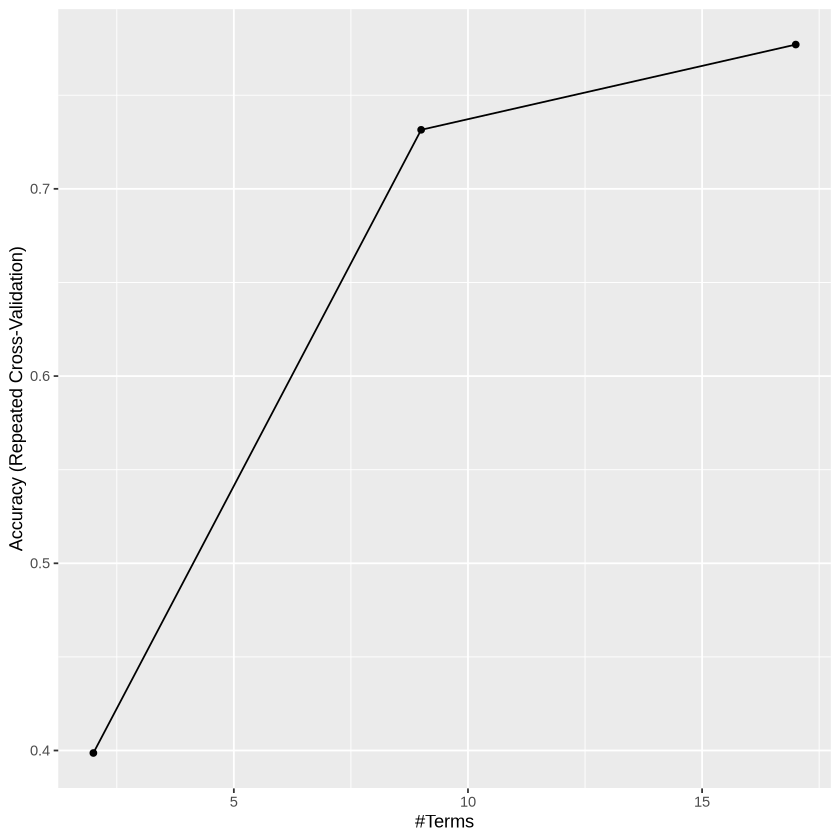

In [29]:
ggplot(flexibleFit)

In [30]:
# nprune is pruning tree branches because probably has a random forest underneath, but not sure. 
set.seed(42)
highDimensionalFit <- train(Pattern ~ ., data = cellTrain, 
                 method = "hdda", 
                 trControl = fitControl
                 )
highDimensionalFit

High Dimensional Discriminant Analysis 

16800 samples
   15 predictor
    6 classes: 'cell-edge', 'extranuclear', 'intranuclear', 'pericellular', 'perinuclear', 'random' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 15120, 15120, 15120, 15120, 15120, 15120, ... 
Resampling results across tuning parameters:

  threshold  Accuracy   Kappa    
  0.050      0.7913988  0.7446576
  0.175      0.7852679  0.7367693
  0.300      0.7844762  0.7357993

Tuning parameter 'model' was held constant at a value of all
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were threshold = 0.05 and model = all.

In [63]:
# model ="ALL" -> all models are tested, the model with the highest BIC score is returned.
final_highDimensionalFit <- hdda(data=cellTrain[,1:15], cls=cellTrain$Pattern, model="ALL", threshold = 0.05)
# The chosen model is very close to the most general model possible. 
# AKJ: each class has its parameters and there is one parameter for each dimension
# BK: each class has its proper noise
# All classes have its proper orientation matrix
# D: the dimension is common to all classes
final_highDimensionalFit

HIGH DIMENSIONAL DISCRIMINANT ANALYSIS
MODEL: AKJBKQKD
  Prior probabilities of groups:
   cell-edge extranuclear intranuclear pericellular perinuclear random
       0.143        0.143        0.143        0.143       0.143  0.286
      Intrinsic dimensions of the classes:
       cell-edge extranuclear intranuclear pericellular perinuclear random
  dim:         5            5            5            5           5      5
              Akj:
Class            a1   a2   a3   a4   a5
  cell-edge    16.3 3.37 1.45 1.09 1.01
  extranuclear 19.9 3.47 2.22 1.56 1.42
  intranuclear 27.1 8.19 5.24 3.40 1.09
  pericellular 17.1 6.18 4.29 3.53 2.41
  perinuclear  24.8 7.01 5.69 3.73 2.85
  random       19.8 3.48 2.26 1.67 1.28
    cell-edge extranuclear intranuclear pericellular perinuclear random
Bk:     0.372        0.616        0.407         0.56       0.912  0.456
BIC:  -782610.8 

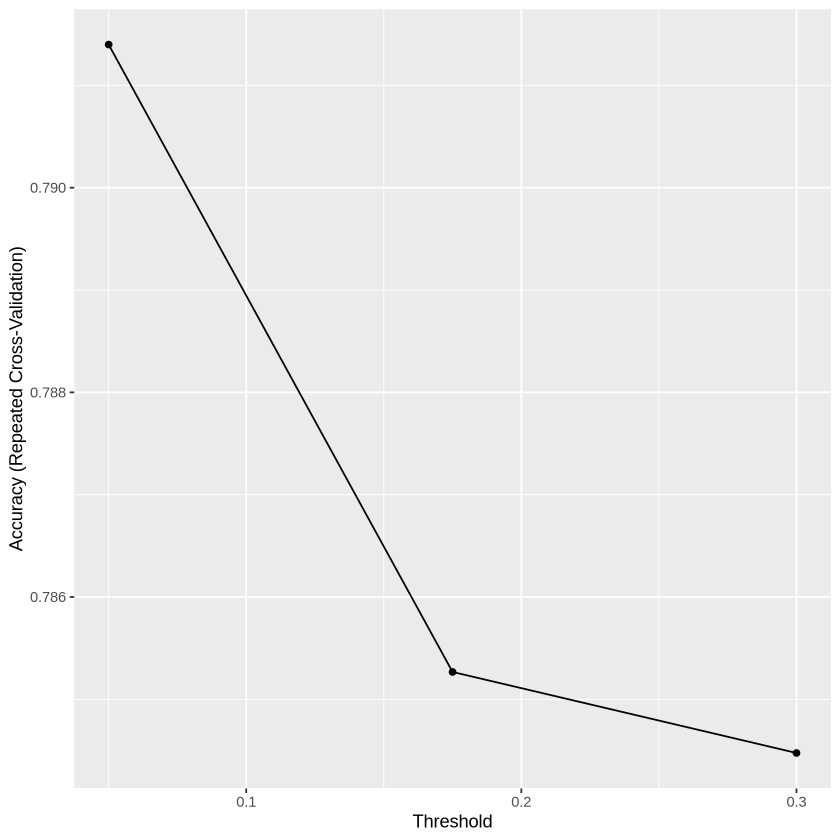

In [31]:
ggplot(highDimensionalFit)

In [42]:
library(foreach)
library(doParallel)
library(kfda)

Accuracy scores: 0.7941799 0.8055556 0.8064815 0.4598545 
Optimal sigma_inverse: 0.01 


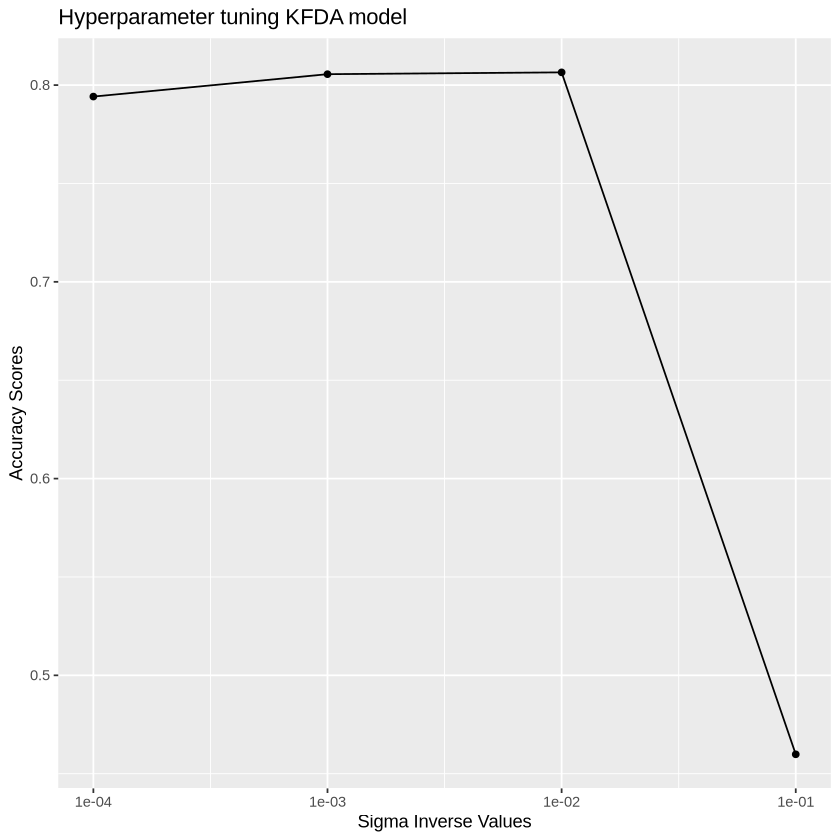

In [113]:
# I could not get 10-fold cross-validation to work due to parallelization issues, both coded myself and via the caret framework.
# Instead I am splitting my training data in a training and validation set, with the same sizes as the crossvalidation to ensure power differences doesn't skew the accuracy. 

num_cores <- detectCores()
cl <- makeCluster(num_cores)
registerDoParallel(cl)

# We explore the grid space of the bandwidth with a logarithmic scale
sigma_inverse_values <- c(0.0001, 0.001, 0.01, 0.1)

# Initialize vectors to store results
accuracy_scores <- numeric(length(sigma_inverse_values))

# I could not get 10-fold cross-validation to work due to parallelization issues, both coded myself and via the caret framework.
# Instead I am splitting my training data in a training and validation set, with the same sizes as the crossvalidation to ensure power differences doesn't skew the accuracy. 
set.seed(42)
trainIndex <- createDataPartition(cellTrain$Pattern, p = .9, 
                                  list = FALSE, 
                                  times = 1)
training_set <- cellTrain[-trainIndex,]
validate_set <- cellTrain[trainIndex,]

# for each sigma value, do a 10-CV and obtain the average accuracy across folds.
accuracy_scores <- foreach(sigma_inverse = sigma_inverse_values, .combine = 'c') %dopar% {
  kfda_model <- kfda::kfda(trainData = training_set, kernel.name = "rbfdot", kpar.sigma = sigma_inverse)
  predicted_cell <- kfda::kfda.predict(object = kfda_model, testData = validate_set)
  
  # Compare the predictions with the true class labels, 
  # and calculate the proportion of correct prediction in the current fold by taking the mean of the logical vector
  # Assign that proportion to the current sigma_inverse.
  mean(predicted_cell$class == validate_set$Pattern)
}
# Stop the parallel backend
stopCluster(cl)


# Find the optimal sigma_inverse based on the highest accuracy
optimal_sigma_inverse <- sigma_inverse_values[which.max(accuracy_scores)]
cat("Accuracy scores:", accuracy_scores, "\n")
cat("Optimal sigma_inverse:", optimal_sigma_inverse, "\n")

# Create plot of the compared hyperparameters
df <- data.frame(sigma_inverse = sigma_inverse_values, accuracy = accuracy_scores)
ggplot(df, aes(x = sigma_inverse, y = accuracy)) +
  geom_line() + 
  geom_point() + # Add points for each data point
  labs(x = "Sigma Inverse Values", y = "Accuracy Scores", title = "Hyperparameter tuning KFDA model") +
  scale_x_log10() # Set x-axis on log scale


In [ ]:
# Train the final model using the optimal sigma_inverse on the entire training set
final_kfda_model <- kfda(trainData = cellTrain, kernel.name = "rbfdot", kpar.sigma = optimal_sigma_inverse)

In [114]:
## ---------------- Model Testing -------------------

kfda_finalPredictions <- kfda.predict(object = final_kfda_model, testData = cellTest)

In [115]:
# prediction accuracy and Confusion Matrix
print(mean(kfda_finalPredictions$class == cellTest$Pattern))
table(kfda_finalPredictions$class, (cellTest$Pattern))

[1] 0.7988095


              
               cell-edge extranuclear intranuclear pericellular perinuclear
  cell-edge          359          130            0            7          12
  extranuclear        99          344            0           28          88
  intranuclear         0            0          589            0           0
  pericellular        27           21            5          548          11
  perinuclear          4           58            1           17         470
  random             111           47            5            0          19
              
               random
  cell-edge       103
  extranuclear     36
  intranuclear      1
  pericellular      2
  perinuclear      13
  random         1045

In [67]:
# High Dimensional Discriminant Analysis Accuracy and Confusion Matrix
HD_finalPrediction <- predict(object=final_highDimensionalFit, data=cellTest[,1:15], cls = cellTest$Pattern)

Correct classification rate: 0.7942857.
               Initial class
Predicted class cell-edge extranuclear intranuclear pericellular perinuclear
   cell-edge          405          171            0           42          26
   extranuclear        85          324            0           13          79
   intranuclear         0            0          598            0           0
   pericellular         3            6            0          520          16
   perinuclear          3           49            1           25         460
   random             104           50            1            0          19
               Initial class
Predicted class random
   cell-edge       126
   extranuclear     33
   intranuclear      2
   pericellular      1
   perinuclear       9
   random         1029


In [48]:
#fda_finalPrediction <- mda::predict(object = flexibleFit, newdata = cellTest, type = "class")
fda_finalPrediction <- predict(object = flexibleFit, newdata = cellTest)

In [72]:
# prediction accuracy and Confusion Matrix
print(mean(fda_finalPrediction == cellTest$Pattern))
table(fda_finalPrediction, (cellTest$Pattern))

[1] 0.7838095


                   
fda_finalPrediction cell-edge extranuclear intranuclear pericellular
       cell-edge          365          125           15           19
       extranuclear       109          351            4           31
       intranuclear         0            0          573            0
       pericellular        24           21            0          518
       perinuclear          3           63            1           32
       random              99           40            7            0
                   
fda_finalPrediction perinuclear random
       cell-edge             17    109
       extranuclear          99     46
       intranuclear           0      1
       pericellular           6      5
       perinuclear          458     12
       random                20   1027